In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as  plt
import sklearn

In [2]:
df = pd.read_csv("Exam2019.csv")
df.head()

,Default,checkingstatus1,duration,history,purpose,amount,savings,employ,installment,status,...,residence,property,age,otherplans,housing,cards,job,liable,tele,foreign
0,0,A11,6,A34,A43,1169,A65,A75,4,A93,...,4,A121,67,A143,A152,2,A173,1,A192,A201
1,1,A12,48,A32,A43,5951,A61,A73,2,A92,...,2,A121,22,A143,A152,1,A173,1,A191,A201
2,0,A14,12,A34,A46,2096,A61,A74,2,A93,...,3,A121,49,A143,A152,1,A172,2,A191,A201
3,0,A11,42,A32,A42,7882,A61,A74,2,A93,...,4,A122,45,A143,A153,1,A173,2,A191,A201
4,1,A11,24,A33,A40,4870,A61,A73,3,A93,...,4,A124,53,A143,A153,2,A173,2,A191,A201


In [3]:
stats = []
for col in df.columns:
    stats.append((col, df[col].nunique(), df[col].isnull().sum() * 100 / df.shape[0], df[col].value_counts(normalize=True, dropna=False).values[0] * 100, df[col].dtype))
    
stats_df = pd.DataFrame(stats, columns=['Feature', 'Unique_values', 'Percentage of missing values', 'Percentage of values in the biggest category', 'type'])
stats_df.sort_values('Percentage of missing values', ascending=False)

,Feature,Unique_values,Percentage of missing values,Percentage of values in the biggest category,type
0,Default,2,0.0,70.0,int64
11,residence,4,0.0,41.3,int64
19,tele,2,0.0,59.6,object
18,liable,2,0.0,84.5,int64
17,job,4,0.0,63.0,object
16,cards,4,0.0,63.3,int64
15,housing,3,0.0,71.3,object
14,otherplans,3,0.0,81.4,object
13,age,53,0.0,5.1,int64
12,property,4,0.0,33.2,object


0    700
1    300
Name: Default, dtype: int64

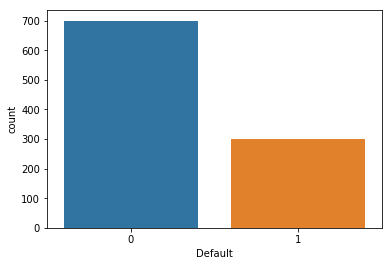

In [4]:
ax = sns.countplot(x="Default", data=df)
df['Default'].value_counts()

In [5]:
df.apply(lambda x: x.value_counts()).T.stack()

Default          0       700.0
                 1       300.0
checkingstatus1  A11     274.0
                 A12     269.0
                 A13      63.0
                 A14     394.0
duration         4         6.0
                 5         1.0
                 6        75.0
                 7         5.0
                 8         7.0
                 9        49.0
                 10       28.0
                 11        9.0
                 12      179.0
                 13        4.0
                 14        4.0
                 15       64.0
                 16        2.0
                 18      113.0
                 20        8.0
                 21       30.0
                 22        2.0
                 24      184.0
                 26        1.0
                 27       13.0
                 28        3.0
                 30       40.0
                 33        3.0
                 36       83.0
                         ...  
age              62        2.0
        

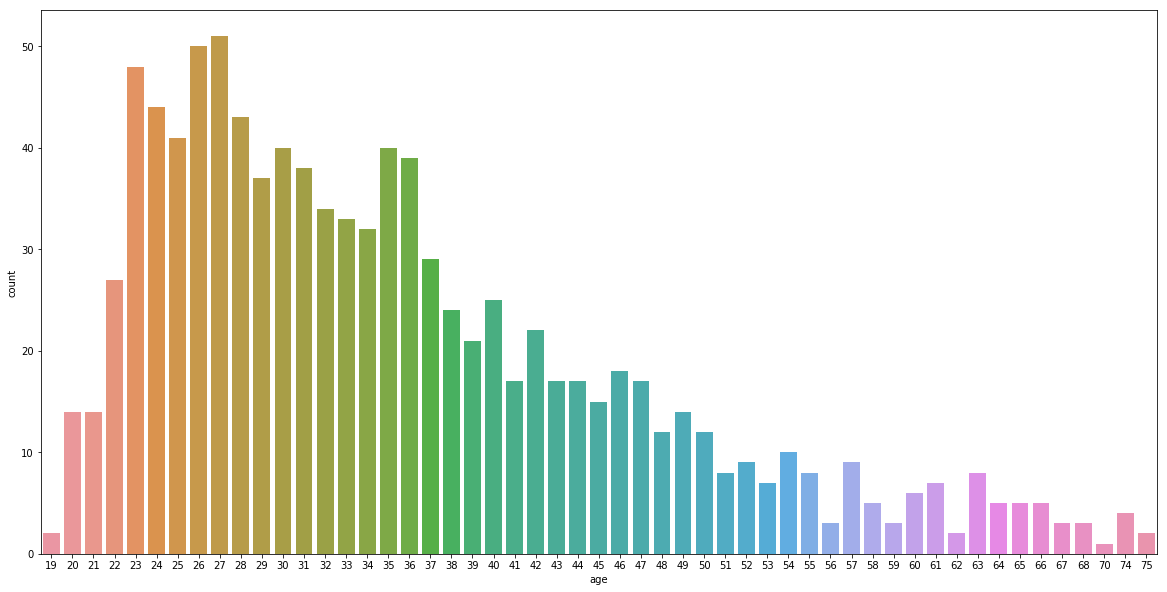

In [6]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x="age", data=df)

In [7]:
df['amount'].describe()

count     1000.000000
mean      3271.258000
std       2822.736876
min        250.000000
25%       1365.500000
50%       2319.500000
75%       3972.250000
max      18424.000000
Name: amount, dtype: float64

In [8]:
df['monthlyamount'] = df['amount']/df['duration']
df['monthlyamount'].describe()

count    1000.000000
mean      167.687020
std       153.490959
min        24.055556
25%        89.600000
50%       130.333333
75%       206.183333
max      2482.666667
Name: monthlyamount, dtype: float64

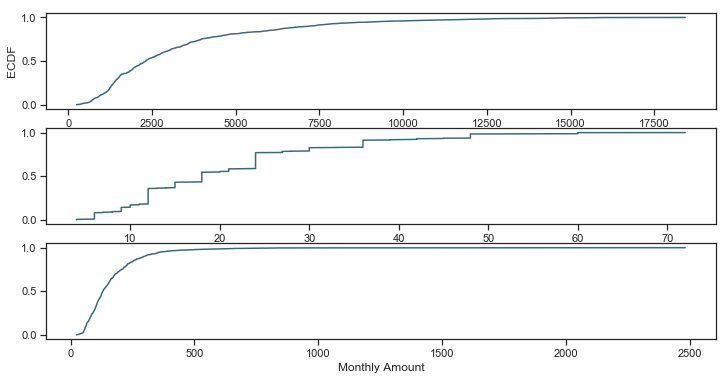

In [9]:
# statistics
from statsmodels.distributions.empirical_distribution import ECDF
#ECDF: empirical cumulative distribution function
sns.set(style = "ticks")
c = '#386B7F'
plt.figure(figsize = (12, 6))

plt.subplot(311)
cdf = ECDF(df['amount'])
plt.plot(cdf.x, cdf.y, label = "statmodels", color = c);
plt.xlabel('Amount'); plt.ylabel('ECDF');


plt.subplot(312)
cdf = ECDF(df['duration'])
plt.plot(cdf.x, cdf.y, label = "statmodels", color = c);
plt.xlabel('Duration');


plt.subplot(313)
cdf = ECDF(df['monthlyamount'])
plt.plot(cdf.x, cdf.y, label = "statmodels", color = c);
plt.xlabel('Monthly Amount');

In [10]:
import plotly
from plotly import tools
import plotly.plotly as py
import plotly.graph_objs as go
plotly.tools.set_credentials_file(username='ThomasKhieu', api_key='J27VpfgwIbn8LEzoQvZm')


plot0 = go.Bar(
    x = df[df["Default"]== 0]["housing"].value_counts().index.values,
    y = df[df["Default"]== 0]["housing"].value_counts().values,
    name='No'
)

plot1 = go.Bar(
    x = df[df["Default"]== 1]["housing"].value_counts().index.values,
    y = df[df["Default"]== 1]["housing"].value_counts().values,
    name="Yes"
)

data = [plot0, plot1]

layout = go.Layout(
    title='Housing By Credit Default'
)


fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='Housing')


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [11]:
df.groupby('duration')['amount'].describe()

,count,mean,std,min,25%,50%,75%,max
duration,,,,,,,,
4,6.0,1662.833333,915.152319,601.0,1464.75,1498.5,1533.75,3380.0
5,1.0,3448.000000,NaN,3448.0,3448.00,3448.0,3448.00,3448.0
6,75.0,1787.733333,2422.428463,250.0,691.50,1237.0,1746.50,14896.0
7,5.0,1779.200000,910.095435,730.0,846.00,2329.0,2415.00,2576.0
8,7.0,1373.000000,928.221597,731.0,833.50,1164.0,1325.50,3398.0
9,49.0,1714.714286,931.806154,276.0,1154.00,1391.0,2134.00,5129.0
10,28.0,1888.964286,1285.531638,727.0,1237.75,1469.5,2162.00,7308.0
11,9.0,3047.888889,2069.404289,1154.0,1393.00,2142.0,3939.00,7228.0
12,179.0,1787.446927,1266.271498,339.0,954.50,1412.0,2160.00,7865.0


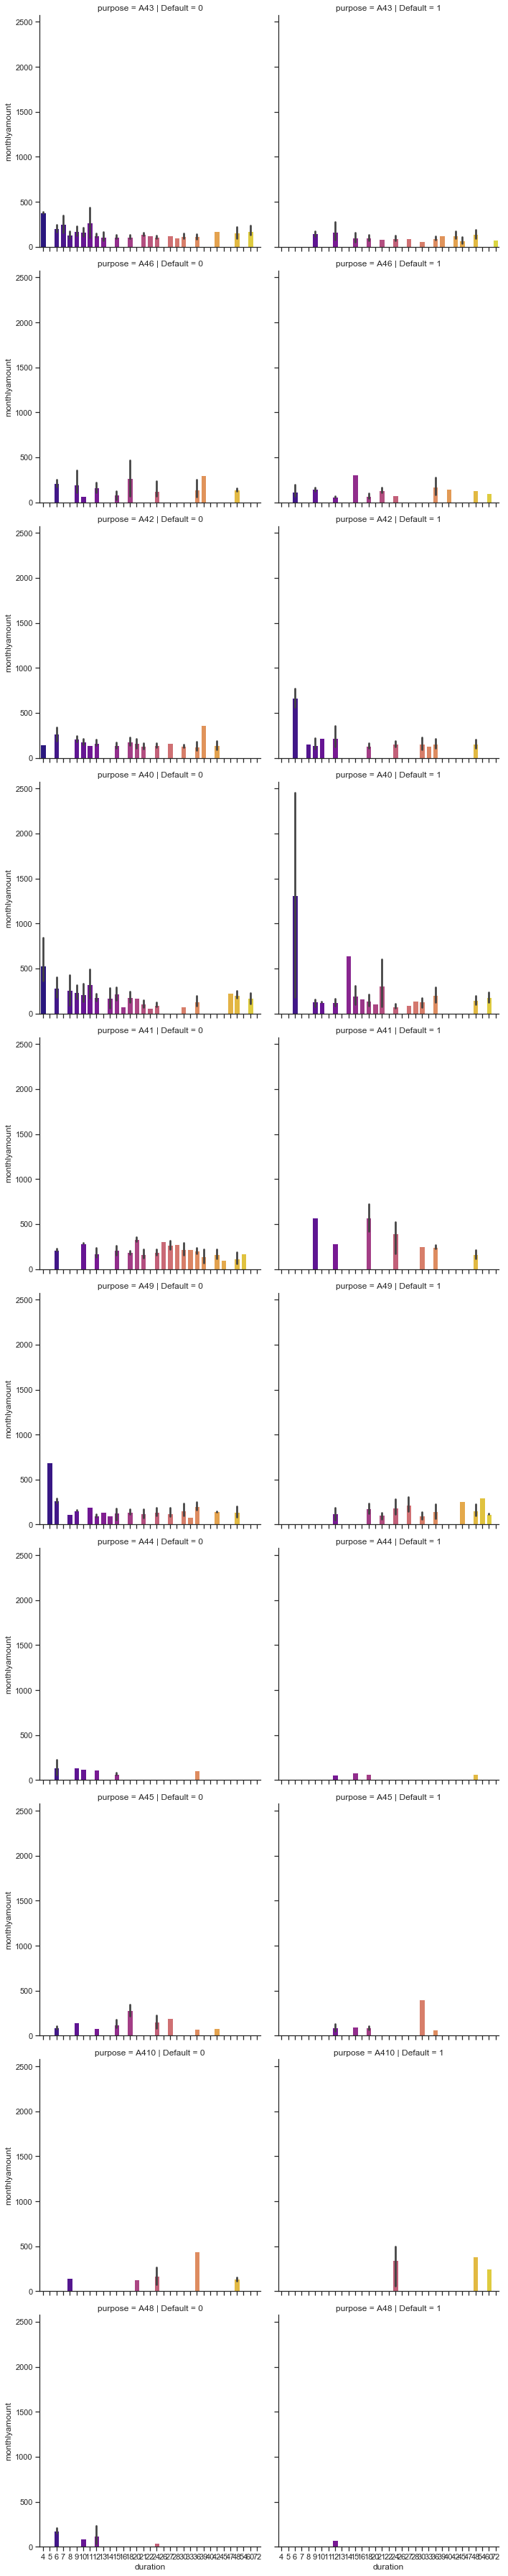

In [12]:
sns.catplot(data = df, x = 'duration', y = "monthlyamount", 
               col = 'Default',
               palette = 'plasma',
               row = 'purpose',
            kind="bar",
               color = c) 

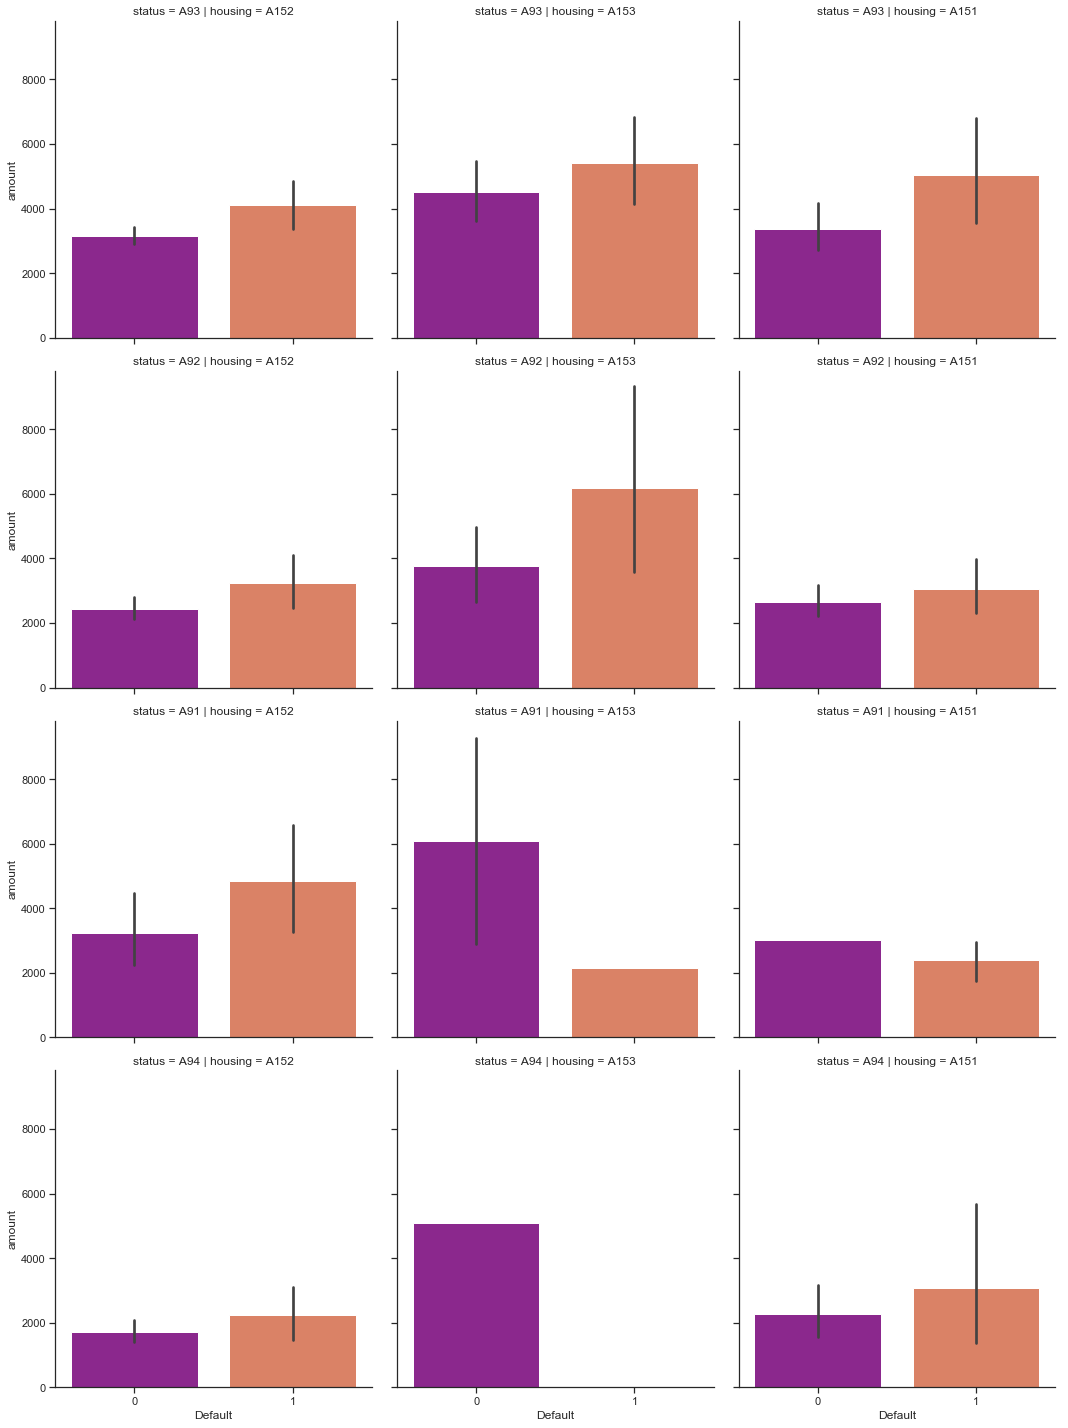

In [13]:
sns.catplot(data = df, x = 'Default', y = "amount", 
               col = 'housing',
               palette = 'plasma',
               row = 'status',
            kind="bar",
               color = c) 

In [14]:
df.groupby('Default')['monthlyamount'].describe()

,count,mean,std,min,25%,50%,75%,max
Default,,,,,,,,
0,700.0,165.819730,110.574834,25.250000,96.906250,134.916667,211.975000,1126.833333
1,300.0,172.044031,223.840381,24.055556,76.197917,121.058333,196.361111,2482.666667


In [15]:
df.groupby('status')['monthlyamount'].describe()

,count,mean,std,min,25%,50%,75%,max
status,,,,,,,,
A91,50.0,184.656978,124.347101,53.125000,103.991667,150.919048,222.375000,641.285714
A92,310.0,151.083424,107.235622,24.055556,83.189394,125.166667,180.743056,845.000000
A93,548.0,183.602865,182.753485,25.250000,97.135417,142.994048,224.383333,2482.666667
A94,92.0,119.608042,74.452059,28.250000,71.958333,99.623810,131.666667,351.333333


In [16]:
interval = (18, 25, 35, 60, 120)

cats = ['Gen Z', 'Millenial', 'Gen X', 'Baby Boomer']
df["age"] = pd.cut(df.age, interval, labels=cats)

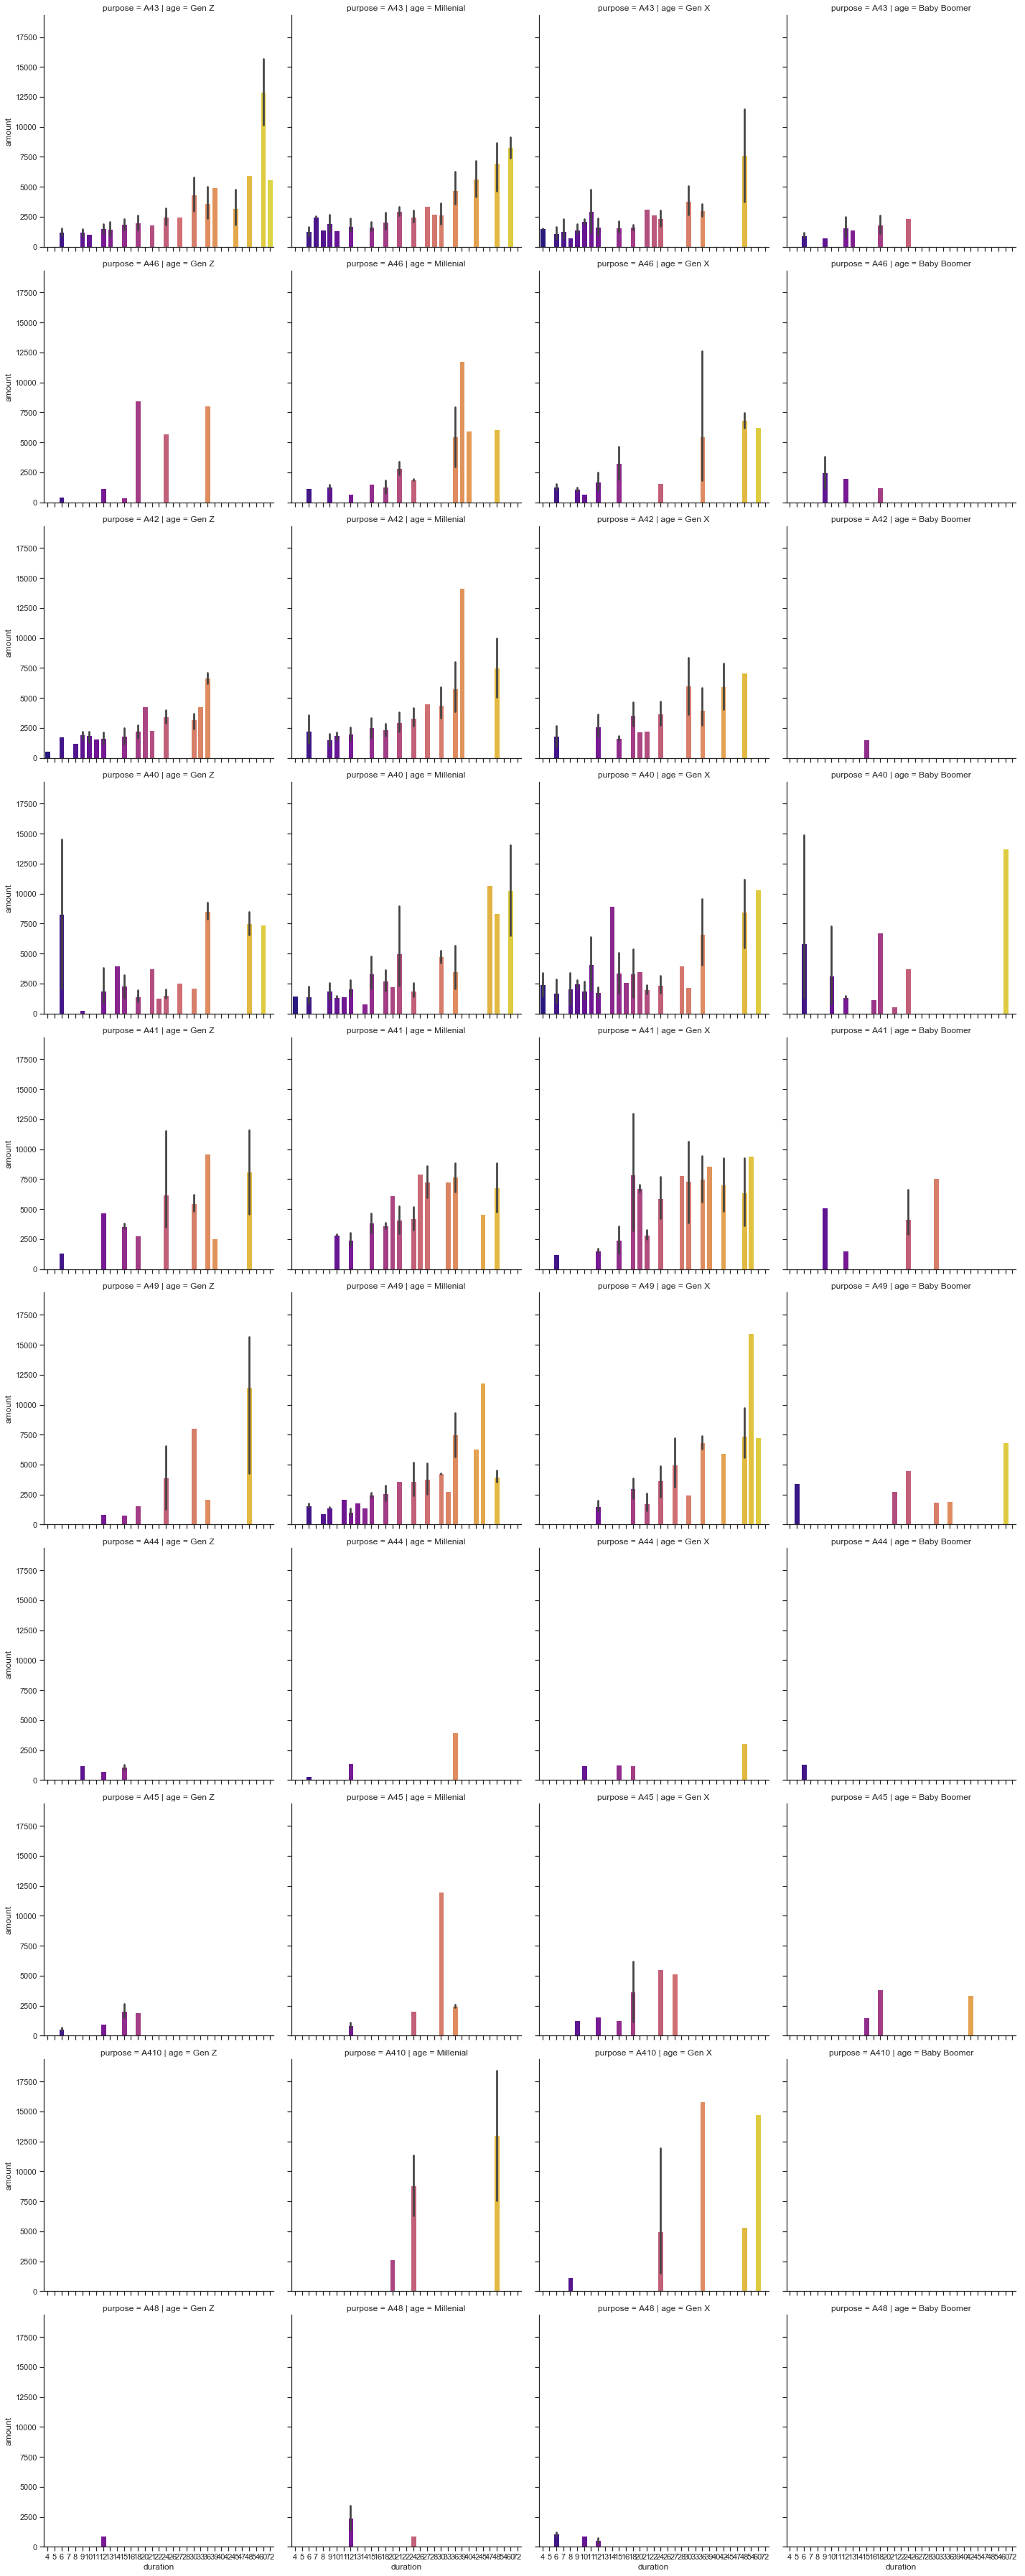

In [17]:
#purposebyduration
sns.catplot(data = df, x = 'duration', y = "amount",
               palette = 'plasma', col = "age",
               row = 'purpose',
            kind="bar",
               color = c) 

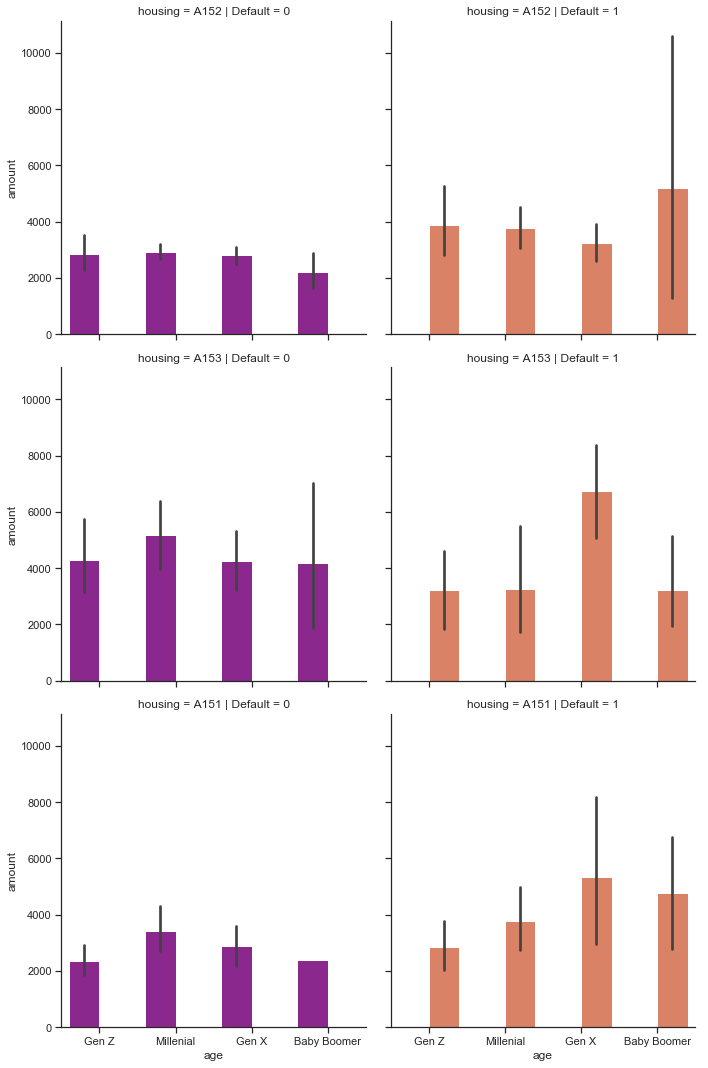

In [18]:
sns.catplot(data = df, x = 'age', y = "amount", 
               col = 'Default',
               palette = 'plasma',
               hue = 'Default',
               row = 'housing',
            kind="bar",
               color = c) 

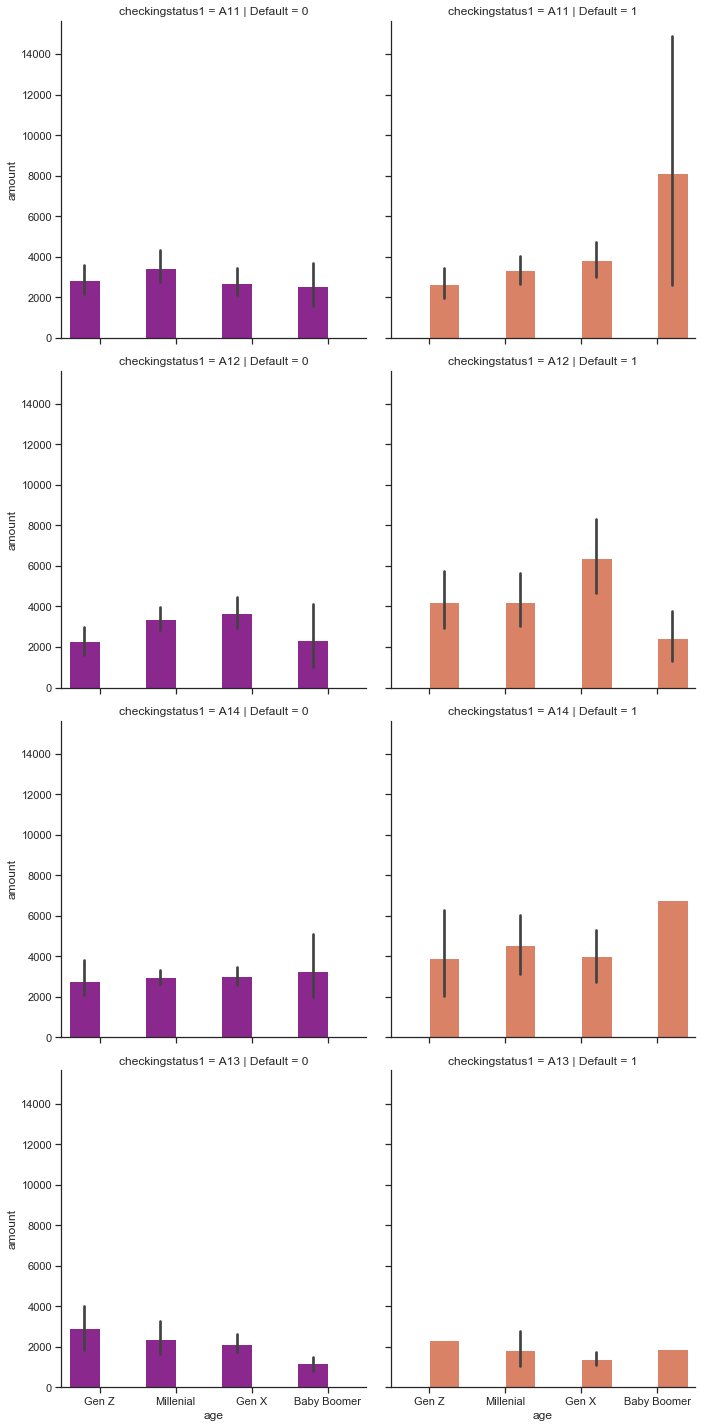

In [19]:
sns.catplot(data = df, x = 'age', y = "amount", 
               col = 'Default',
               palette = 'plasma',
               hue = 'Default',
               row = 'checkingstatus1',
            kind="bar",
               color = c)

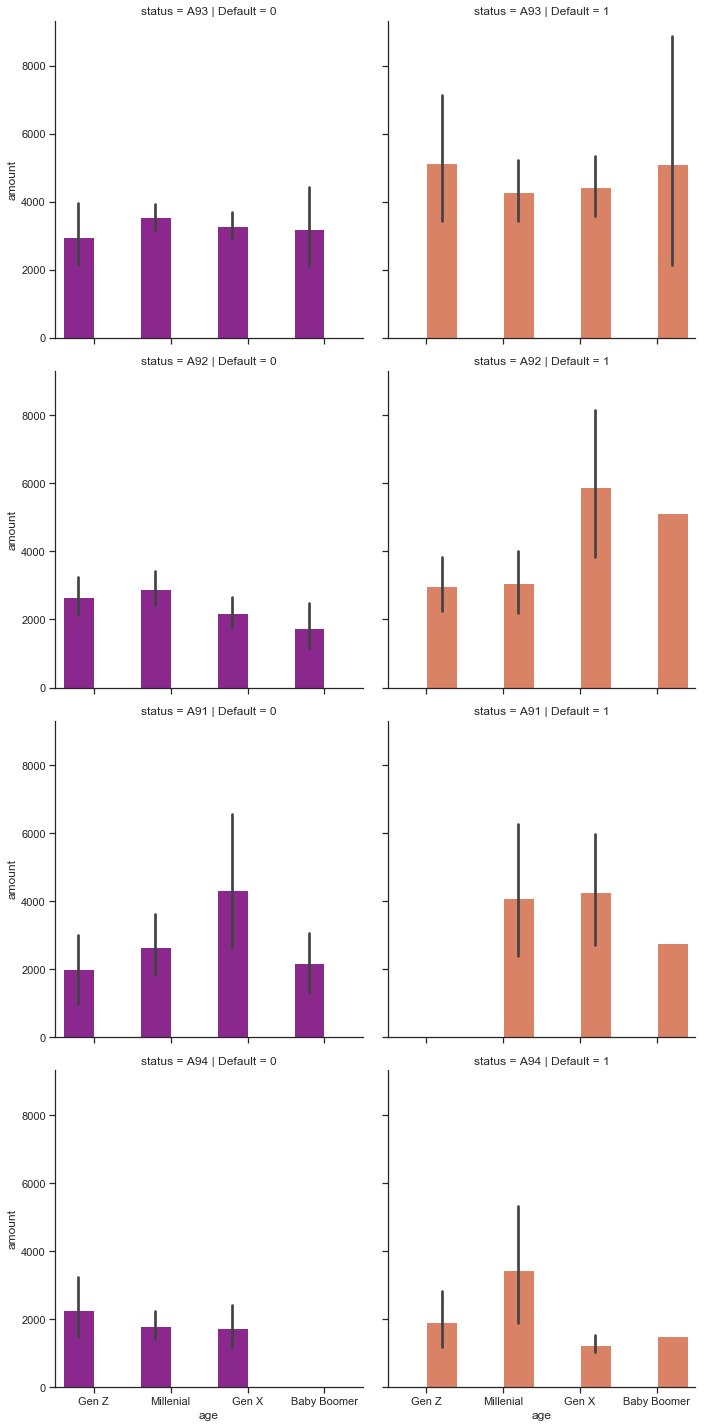

In [20]:
sns.catplot(data = df, x = 'age', y = "amount", 
               col = 'Default',
               palette = 'plasma',
               hue = 'Default',
               row = 'status',
            kind="bar",
               color = c) 

In [21]:
date_int = ["purpose", "status"]
cm = sns.light_palette("green", as_cmap=True)
pd.crosstab(df[date_int[0]], df[date_int[1]]).style.background_gradient(cmap = cm)

status,A91,A92,A93,A94
purpose,,,,
A40,10,70,134,20
A41,3,24,70,6
A410,1,3,8,0
A42,15,74,85,7
A43,7,85,146,42
A44,1,6,4,1
A45,2,5,12,3
A46,1,21,27,1
A48,0,3,3,3


In [22]:
df.corr()

,Default,duration,amount,installment,residence,cards,liable,monthlyamount
Default,1.000000,0.214927,0.154739,0.072404,0.002967,-0.045732,-0.003015,0.018592
duration,0.214927,1.000000,0.624984,0.074749,0.034067,-0.011284,-0.023834,-0.126498
amount,0.154739,0.624984,1.000000,-0.271316,0.028926,0.020795,0.017142,0.521938
installment,0.072404,0.074749,-0.271316,1.000000,0.049302,0.021669,-0.071207,-0.396191
residence,0.002967,0.034067,0.028926,0.049302,1.000000,0.089625,0.042643,0.009277
cards,-0.045732,-0.011284,0.020795,0.021669,0.089625,1.000000,0.109667,-0.003556
liable,-0.003015,-0.023834,0.017142,-0.071207,0.042643,0.109667,1.000000,0.086580
monthlyamount,0.018592,-0.126498,0.521938,-0.396191,0.009277,-0.003556,0.086580,1.000000


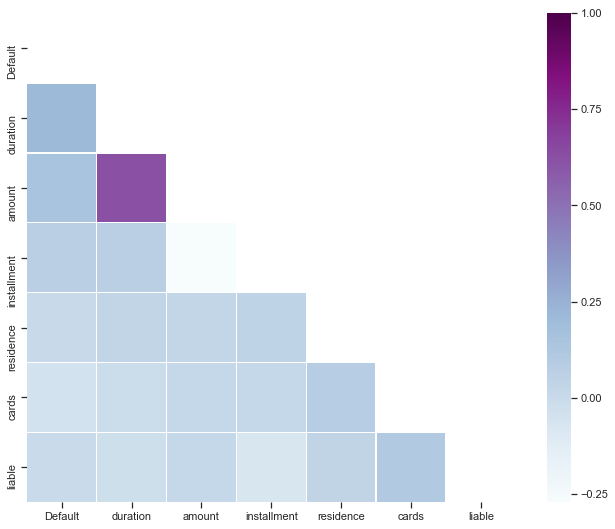

In [23]:
# Compute the correlation matrix 
corr_all = df.drop('monthlyamount', axis = 1).corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr_all, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize = (11, 9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_all, mask = mask,
            square = True, linewidths = .5, ax = ax, cmap = "BuPu")      
plt.show()

Text(0.5, 1.0, 'Credit amount distribution for bad transactions')

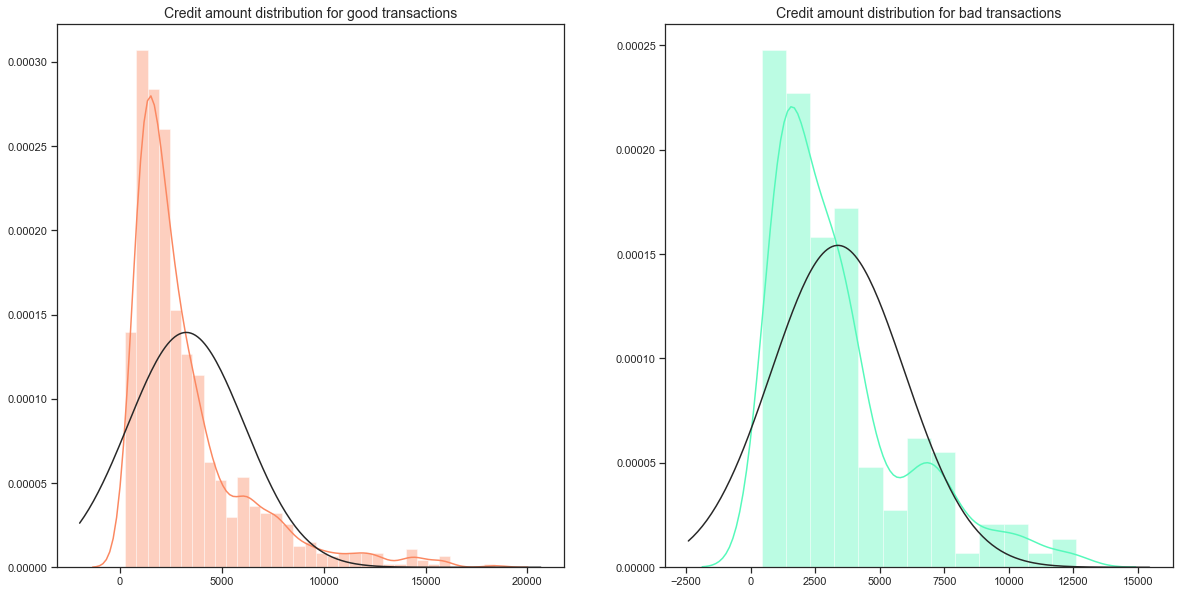

In [24]:
from scipy.stats import norm

f, (ax1,ax2) =plt.subplots(1,2, figsize=(20, 10))

credit_amount_dist = df['amount'].loc[df['liable'] == 1].values
sns.distplot(credit_amount_dist,ax=ax1, fit=norm, color='#FB8861')
ax1.set_title('Credit amount distribution for good transactions', fontsize=14)

credit_amount_dist = df['amount'].loc[df['liable'] == 2].values
sns.distplot(credit_amount_dist,ax=ax2, fit=norm, color='#56F9BB')
ax2.set_title('Credit amount distribution for bad transactions', fontsize=14)


 mu = 3271.26 and sigma = 2821.33



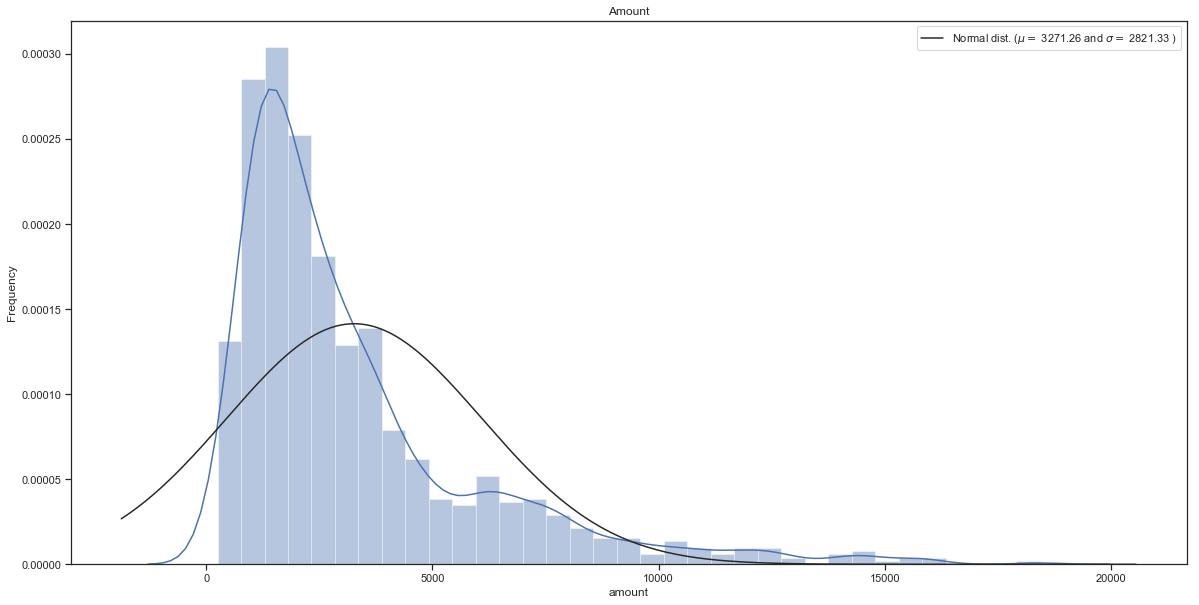

<Figure size 432x288 with 0 Axes>

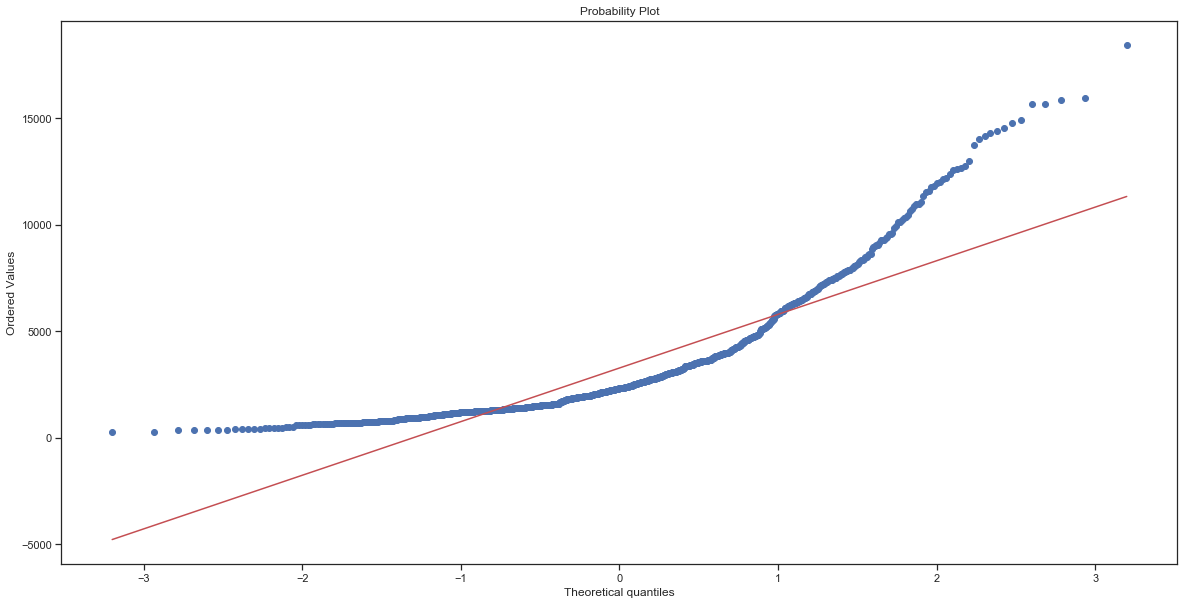

In [25]:
from scipy import stats
from scipy.stats import norm, skew
plt.figure(figsize=(20,10))
sns.distplot(df['amount'] , fit=norm);

#Fitted parameters used by the function
(mu, sigma) = norm.fit(df['amount'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Amount')

#QQ-plot
fig = plt.figure()
plt.figure(figsize=(20,10))
res = stats.probplot(df['amount'], plot=plt)
plt.show()

In [26]:
df = df.dropna(how='any')

In [27]:
#multiplelinearregression
from statsmodels.formula.api import ols
model = ols("Default ~ age + checkingstatus1+others + duration + history + purpose + amount +savings +employ+installment+status+residence+property+age+otherplans+housing+cards+job+liable+tele+foreign+monthlyamount", data=df)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Default   R-squared:                       0.286
Model:                            OLS   Adj. R-squared:                  0.248
Method:                 Least Squares   F-statistic:                     7.464
Date:                Thu, 13 Jun 2019   Prob (F-statistic):           4.15e-42
Time:                        10:42:20   Log-Likelihood:                -469.83
No. Observations:                1000   AIC:                             1044.
Df Residuals:                     948   BIC:                             1299.
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0.5320      0.172      3.096      0.002       0.195       0.869
age[T.Millenial]          -0.0655      0.039     -1.695      0.090      -0.141       0.010
age[T.Gen X]              -0.0949      0.043     -2.220      0.027      -0.179      -0.011
age[T.Baby Boomer]        -0.1180      0.073     -1.618      0.106      -0.261       0.025
checkingstatus1[T.A12]    -0.0749      0.037     -2.039      0.042      -0.147      -0.003
checkingstatus1[T.A13]    -0.1779      0.058     -3.080      0.002      -0.291      -0.065
checkingstatus1[T.A14]    -0.2637      0.035     -7.620      0.000      -0.332      -0.196
others[T.A102]             0.0857      0.066      1.292      0.197      -0.044       0.216
others[T.A103]            -0.1615      0.060     -2.670      0.008      -0.280      -0.043
history[T.A31]             0.0013      0.090      0.015      0.988      -0.176       0.178
history[T.A32]            -0.1549      0.071     -2.178      0.030      -0.294      -0.015
history[T.A33]            -0.1922      0.078     -2.469      0.014      -0.345      -0.039
history[T.A34]            -0.2677      0.072     -3.720      0.000      -0.409      -0.126
purpose[T.A41]            -0.2244      0.050     -4.452      0.000      -0.323      -0.125
purpose[T.A410]           -0.2291      0.126     -1.818      0.069      -0.476       0.018
purpose[T.A42]            -0.1291      0.041     -3.112      0.002      -0.210      -0.048
purpose[T.A43]            -0.1371      0.037     -3.666      0.000      -0.210      -0.064
purpose[T.A44]            -0.0723      0.120     -0.603      0.546      -0.308       0.163
purpose[T.A45]            -0.0443      0.091     -0.487      0.626      -0.223       0.134
purpose[T.A46]             0.0263      0.064      0.412      0.681      -0.099       0.152
purpose[T.A48]            -0.2416      0.139     -1.740      0.082      -0.514       0.031
purpose[T.A49]            -0.1132      0.052     -2.194      0.028      -0.214      -0.012
savings[T.A62]            -0.0526      0.044     -1.184      0.237      -0.140       0.035
savings[T.A63]            -0.0772      0.055     -1.408      0.159      -0.185       0.030
savings[T.A64]            -0.1414      0.062     -2.297      0.022      -0.262      -0.021
savings[T.A65]            -0.1245      0.036     -3.492      0.001      -0.195      -0.055
employ[T.A72]             -0.0047      0.069     -0.068      0.946      -0.140       0.131
employ[T.A73]             -0.0290      0.066     -0.439      0.661      -0.159       0.101
employ[T.A74]             -0.1185      0.069     -1.714      0.087      -0.254       0.017
employ[T.A75]             -0.0474      0.066     -0.715      0.475      -0.177       0.083
status[T.A92]             -0.0666      0.063     -1.054      0.292      -0.191  

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



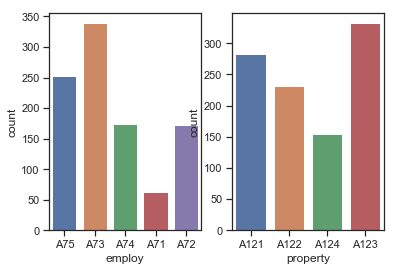

<Figure size 1440x720 with 0 Axes>

In [28]:
fig, ax =plt.subplots(1,2)
plt.figure(figsize=(20,10))
sns.countplot(x="employ", data=df, ax=ax[0])
sns.countplot(x="property", data=df,ax=ax[1])
fig.show()

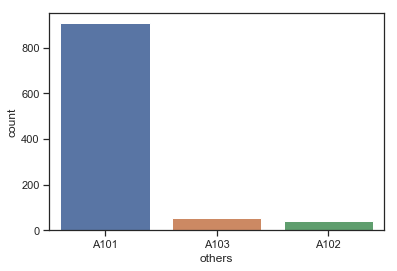

In [29]:
sns.countplot(x="others", data=df)

In [30]:
df["amount"] = np.log1p(df["amount"])
df["monthlyamount"] = np.log1p(df["monthlyamount"])

In [31]:
df = df.dropna(how='any')

In [32]:
from sklearn.preprocessing import StandardScaler
SC= StandardScaler()
credit=df['amount'].values
creditmonth=df['monthlyamount'].values
credit= credit.reshape(-1,1)
creditmonth=creditmonth.reshape(-1,1)
df["amount"]= SC.fit_transform(credit)
df["monthlyamount"] = SC.fit_transform(creditmonth)


 mu = 0.00 and sigma = 1.00



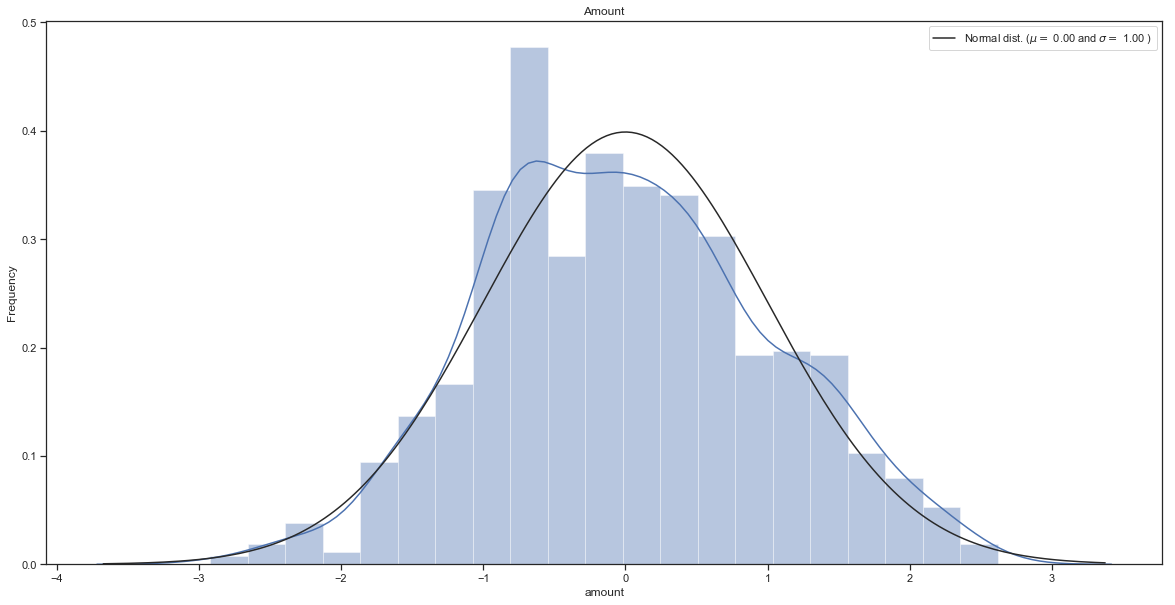

<Figure size 432x288 with 0 Axes>

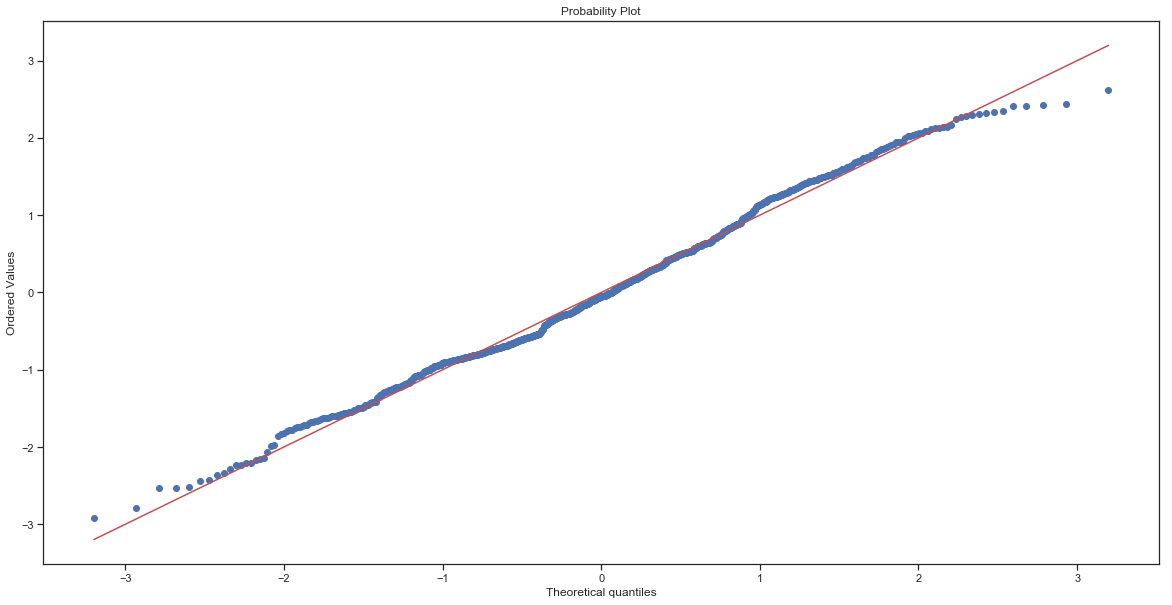

In [33]:
plt.figure(figsize=(20,10))
sns.distplot(df['amount'] , fit=norm);

(mu, sigma) = norm.fit(df['amount'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Amount')

fig = plt.figure()
plt.figure(figsize=(20,10))
res = stats.probplot(df['amount'], plot=plt)
plt.show()


 mu = 0.00 and sigma = 1.00



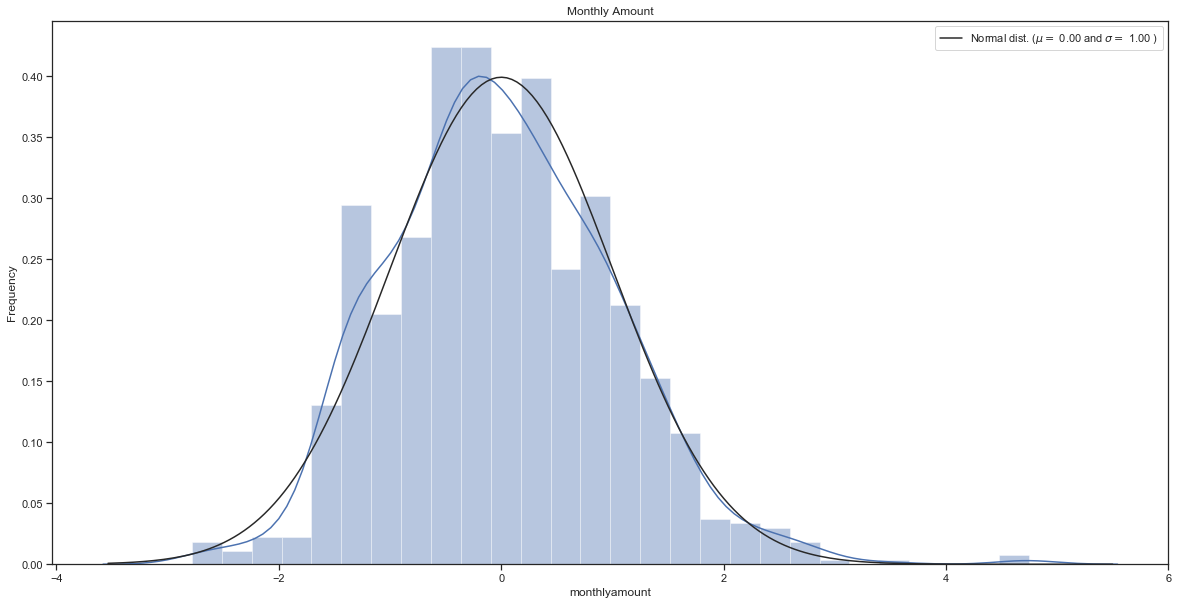

<Figure size 432x288 with 0 Axes>

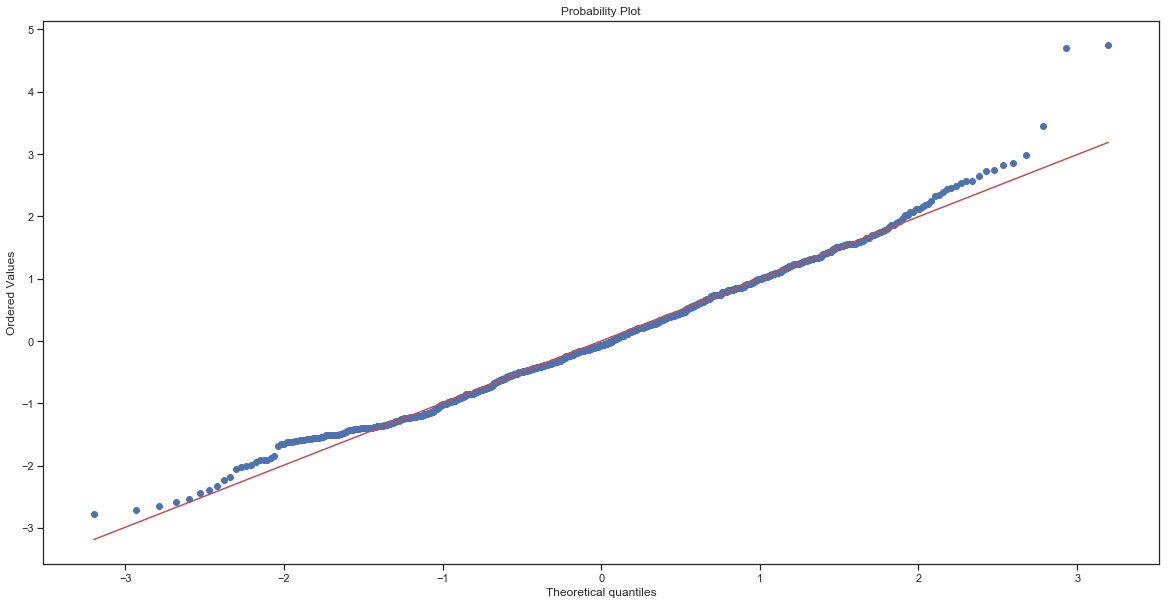

In [34]:
plt.figure(figsize=(20,10))
sns.distplot(df['monthlyamount'] , fit=norm);

(mu, sigma) = norm.fit(df['monthlyamount'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Monthly Amount')

fig = plt.figure()
plt.figure(figsize=(20,10))
res = stats.probplot(df['monthlyamount'], plot=plt)
plt.show()

<h2> Machine Learning - Significant Variables ONLY </h2>

In [35]:
#dummyvariables
df = df.merge(pd.get_dummies(df.purpose, drop_first=True, prefix='purpose'), left_index=True, right_index=True)
df = df.merge(pd.get_dummies(df.status, drop_first=True, prefix='status'), left_index=True, right_index=True)
df = df.merge(pd.get_dummies(df["savings"], drop_first=True, prefix='savings'), left_index=True, right_index=True)
df = df.merge(pd.get_dummies(df["checkingstatus1"], drop_first=True, prefix='checkingstatus1'), left_index=True, right_index=True)
df = df.merge(pd.get_dummies(df.age, drop_first=True, prefix='age'), left_index=True, right_index=True)
df = df.merge(pd.get_dummies(df.history, drop_first=True, prefix='history'), left_index=True, right_index=True)
df = df.merge(pd.get_dummies(df.employ, drop_first=True, prefix='employ'), left_index=True, right_index=True)
df = df.merge(pd.get_dummies(df.property, drop_first=True, prefix='property'), left_index=True, right_index=True)
df = df.merge(pd.get_dummies(df.foreign, drop_first=True, prefix='foreign'), left_index=True, right_index=True)
df = df.merge(pd.get_dummies(df.installment, drop_first=True, prefix='installment'), left_index=True, right_index=True)
df = df.merge(pd.get_dummies(df.duration, drop_first=True, prefix='duration'), left_index=True, right_index=True)

In [36]:
#deleteoldervariables
del df["checkingstatus1"]
del df["savings"]
del df["job"]
del df["status"]
del df["purpose"]
del df["housing"]
del df["history"]
del df["employ"]
del df["property"]
del df["otherplans"]
del df["duration"]
del df["others"]
del df["age"]
del df["tele"]
del df["foreign"]
del df["installment"]
del df["residence"]
del df["cards"]
del df["liable"]
del df["monthlyamount"]

In [37]:
list(df)

['Default',
 'amount',
 'purpose_A41',
 'purpose_A410',
 'purpose_A42',
 'purpose_A43',
 'purpose_A44',
 'purpose_A45',
 'purpose_A46',
 'purpose_A48',
 'purpose_A49',
 'status_A92',
 'status_A93',
 'status_A94',
 'savings_A62',
 'savings_A63',
 'savings_A64',
 'savings_A65',
 'checkingstatus1_A12',
 'checkingstatus1_A13',
 'checkingstatus1_A14',
 'age_Millenial',
 'age_Gen X',
 'age_Baby Boomer',
 'history_A31',
 'history_A32',
 'history_A33',
 'history_A34',
 'employ_A72',
 'employ_A73',
 'employ_A74',
 'employ_A75',
 'property_A122',
 'property_A123',
 'property_A124',
 'foreign_A202',
 'installment_2',
 'installment_3',
 'installment_4',
 'duration_5',
 'duration_6',
 'duration_7',
 'duration_8',
 'duration_9',
 'duration_10',
 'duration_11',
 'duration_12',
 'duration_13',
 'duration_14',
 'duration_15',
 'duration_16',
 'duration_18',
 'duration_20',
 'duration_21',
 'duration_22',
 'duration_24',
 'duration_26',
 'duration_27',
 'duration_28',
 'duration_30',
 'duration_33',
 'd

In [38]:
X = df
X = df.drop('Default', axis= 1)
y = df['Default']
np.random.seed(888888)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 1)

In [39]:
X_train.head()

,amount,purpose_A41,purpose_A410,purpose_A42,purpose_A43,purpose_A44,purpose_A45,purpose_A46,purpose_A48,purpose_A49,...,duration_36,duration_39,duration_40,duration_42,duration_45,duration_47,duration_48,duration_54,duration_60,duration_72
382,-0.814128,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
994,-0.012604,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
982,0.246832,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
47,-0.746647,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
521,0.359483,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
import prince
mca = prince.MCA(n_components=2,n_iter=3,copy=True,check_input=True,engine='auto',random_state=88)
mca = mca.fit(X)

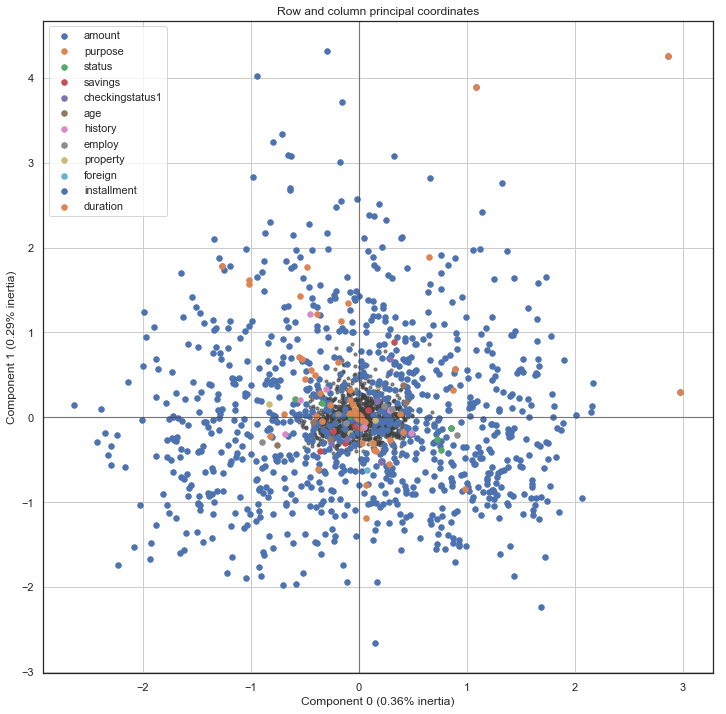

In [41]:
ax = mca.plot_coordinates(X=X,ax=None,figsize=(12, 12),show_row_points=True,row_points_size=10,show_row_labels=False,show_column_points=True,column_points_size=30,show_column_labels=False,legend_n_cols=1)

In [42]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=37, n_iter=100, random_state= 0)
X_train_svd= svd.fit_transform(X_train)

In [43]:
explained_variance=svd.explained_variance_ratio_
explained_variance

array([0.0156573 , 0.16689373, 0.08422529, 0.05601646, 0.05237345,
       0.0482014 , 0.04264055, 0.04114136, 0.03790333, 0.03170448,
       0.0281365 , 0.02708662, 0.02611075, 0.02464655, 0.02359096,
       0.02155554, 0.02032087, 0.01987492, 0.01824492, 0.01675631,
       0.01533869, 0.014757  , 0.01306098, 0.01193596, 0.01093623,
       0.010277  , 0.00944565, 0.00899092, 0.00818814, 0.00760638,
       0.00712872, 0.00669409, 0.00625466, 0.00604757, 0.00567838,
       0.00550066, 0.00527688])

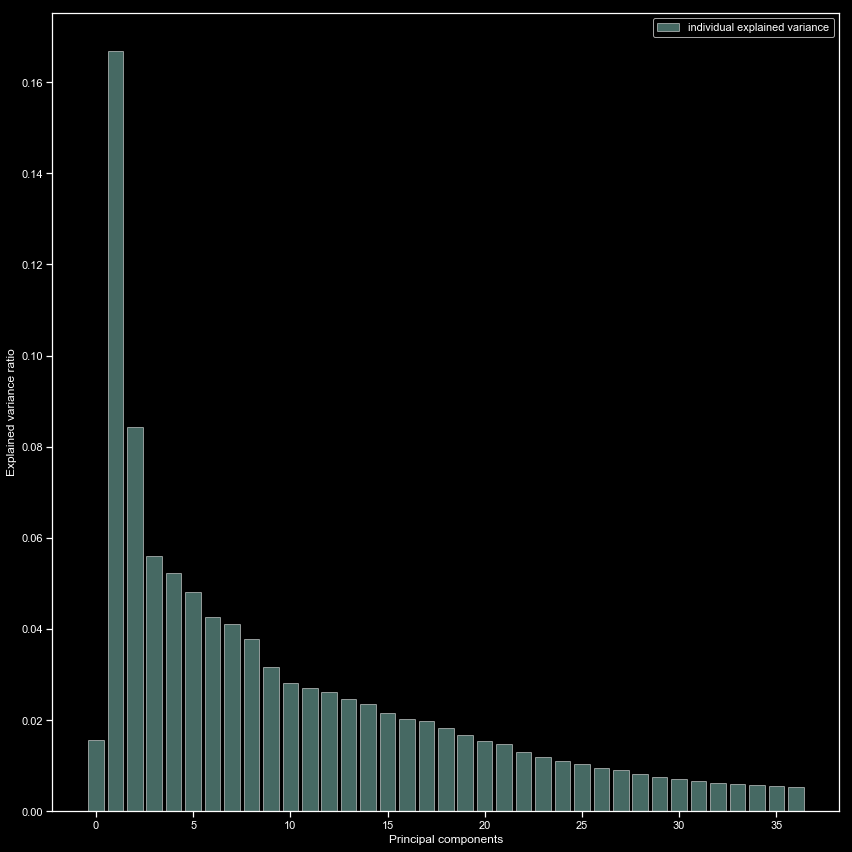

In [44]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(12, 12))
    plt.bar(range(37), explained_variance, alpha=0.5, align='center',
            label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

In [45]:
X_train_svd= pd.DataFrame(X_train_svd)
X_train_svd.head()

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
0,1.538090,0.980088,-0.323861,0.327393,0.604379,-0.540719,-0.330959,-0.964692,-0.261792,0.119656,...,-0.108298,-0.019625,-0.031885,0.051001,0.087962,0.019766,-0.045529,0.132552,0.032563,-0.069409
1,2.197395,0.015605,0.863827,0.531565,0.007187,-0.042033,-1.062534,0.133062,-0.215590,0.589603,...,-0.155175,0.155437,0.014248,-0.029339,0.116242,0.048967,0.023302,-0.054799,-0.069613,-0.068038
2,1.352547,-0.197805,-1.426723,-0.281872,0.155263,-0.023770,-0.113701,0.454865,-0.215835,0.238180,...,0.434594,0.128674,0.597298,0.081585,0.425476,0.069169,0.356796,0.007668,0.010381,0.419549
3,0.845850,0.819021,-0.637392,0.529248,0.682660,0.003774,0.075297,-0.506444,0.197211,-0.084138,...,-0.317418,-0.475099,0.311797,-0.135884,-0.101615,0.087831,0.183550,0.118397,0.052730,0.108213
4,1.147327,-0.200173,-1.108296,0.253396,0.731580,0.322022,-0.111219,0.587025,-0.303627,-0.805505,...,0.092857,-0.065959,-0.024947,-0.075797,-0.110531,-0.143303,0.021754,-0.218327,0.176984,0.075848


In [46]:
X_test_svd= svd.transform(X_test)

In [47]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [48]:
import sklearn
from sklearn import*
abc=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree', 'Random forest', 'Naive Bayes', 'XGBoost']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),
        KNeighborsClassifier(n_neighbors=3),DecisionTreeClassifier(), 
        RandomForestClassifier(n_estimators=100,random_state=0, max_depth = 100), GaussianNB(), XGBClassifier(max_depth= 100, n_estimators=100)]
for i in models:
    model = i
    model.fit(X_train,y_train)
    prediction=model.predict(X_test)
    abc.append(metrics.accuracy_score(prediction,y_test))

models_dataframeacc=pd.DataFrame(abc,index=classifiers)   
models_dataframeacc.columns=['Accuracy']

efg=[]
for i in models:
    model = i
    model.fit(X_train,y_train)
    prediction=model.predict(X_test)
    efg.append(metrics.precision_score(prediction,y_test))

models_dataframeprec=pd.DataFrame(efg,index=classifiers)   
models_dataframeprec.columns=['Precision']

ijk=[]
for i in models:
    model = i
    model.fit(X_train,y_train)
    prediction=model.predict(X_test)
    ijk.append(metrics.recall_score(prediction,y_test))

models_dataframerec=pd.DataFrame(ijk,index=classifiers)   
models_dataframerec.columns=['Recall']

mno=[]
for i in models:
    model = i
    model.fit(X_train,y_train)
    prediction=model.predict(X_test)
    mno.append(metrics.f1_score(prediction,y_test))

models_dataframefone=pd.DataFrame(mno,index=classifiers)   
models_dataframefone.columns=['F1_Score']

scoredf = pd.concat([models_dataframeacc, models_dataframeprec,models_dataframerec,models_dataframefone], axis=1)
scoredf.columns = ["Accuracy","Precision","Recall","F1_score"]
scoredf

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning:

Default solver will be changed to 

,Accuracy,Precision,Recall,F1_score
Linear Svm,0.755,0.423729,0.625000,0.505051
Radial Svm,0.705,0.000000,0.000000,0.000000
Logistic Regression,0.735,0.355932,0.583333,0.442105
KNN,0.675,0.423729,0.446429,0.434783
Decision Tree,0.610,0.423729,0.388060,0.387097
Random forest,0.755,0.338983,0.666667,0.449438
Naive Bayes,0.350,1.000000,0.312169,0.475806
XGBoost,0.650,0.355932,0.396226,0.375000


In [49]:
from sklearn import metrics
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc, roc_curve, recall_score, 
                             classification_report, f1_score, average_precision_score, precision_recall_fscore_support)
import xgboost as xgb

In [50]:
# Logistic regression
modelLR = LogisticRegression()
modelLR.fit(X_train,y_train)
y_pred_prob_lr = modelLR.predict_proba(X_test)[:,1]
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_pred_prob_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)
precision_lr, recall_lr, th_lr = precision_recall_curve(y_test, y_pred_prob_lr)

# SVM with rbf
modelSVMrbf=svm.SVC(kernel='rbf', probability=True)
modelSVMrbf.fit(X_train,y_train)
y_pred_prob_SVMrbf = modelSVMrbf.predict_proba(X_test)[:,1]
fpr_SVMrbf, tpr_SVMrbf, thresholds_SVMrbf = roc_curve(y_test, y_pred_prob_SVMrbf)
roc_auc_SVMrbf = auc(fpr_SVMrbf, tpr_SVMrbf)
precision_SVMrbf, recall_SVMrbf, th_SVMrbf = precision_recall_curve(y_test, y_pred_prob_SVMrbf)

# SVM with linear
modelSVMlinear=svm.SVC(kernel='linear', probability=True)
modelSVMlinear.fit(X_train,y_train)
y_pred_prob_SVMlinear = modelSVMlinear.predict_proba(X_test)[:,1]
fpr_SVMlinear, tpr_SVMlinear, thresholds_SVMlinear = roc_curve(y_test, y_pred_prob_SVMlinear)
roc_auc_SVMlinear = auc(fpr_SVMlinear, tpr_SVMlinear)
precision_SVMlinear, recall_SVMlinear, th_SVMlinear = precision_recall_curve(y_test, y_pred_prob_SVMlinear)

# KNN
modelKNN = KNeighborsClassifier(n_neighbors=3)
modelKNN.fit(X_train,y_train)
y_pred_prob_KNN = modelKNN.predict_proba(X_test)[:,1]
fpr_KNN, tpr_KNN, thresholds_KNN = roc_curve(y_test, y_pred_prob_KNN)
roc_auc_KNN = auc(fpr_KNN, tpr_KNN)
precision_KNN, recall_KNN, th_KNN = precision_recall_curve(y_test, y_pred_prob_KNN)


# Decision Tree
modelTree=DecisionTreeClassifier()
modelTree.fit(X_train,y_train)
y_pred_prob_Tree = modelTree.predict_proba(X_test)[:,1]
fpr_Tree, tpr_Tree, thresholds_Tree = roc_curve(y_test, y_pred_prob_Tree)
roc_auc_Tree = auc(fpr_Tree, tpr_Tree)
precision_Tree, recall_Tree, th_Tree = precision_recall_curve(y_test, y_pred_prob_Tree)

# Random forest
modelRF= RandomForestClassifier(n_estimators=100,random_state=0, max_depth=100)
modelRF.fit(X_train,y_train)
y_pred_prob_rf = modelRF.predict_proba(X_test)[:,1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)
precision_rf, recall_rf, th_rf = precision_recall_curve(y_test, y_pred_prob_rf)


# Naive Bayes
modelNB= GaussianNB()
modelNB.fit(X_train,y_train)
y_pred_prob_nb = modelNB.predict_proba(X_test)[:,1]
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, y_pred_prob_nb)
roc_auc_nb = auc(fpr_nb, tpr_nb)
precision_nb, recall_nb, th_nb = precision_recall_curve(y_test, y_pred_prob_nb)

#XGBoost
modelXGB = xgb.XGBClassifier(max_depth= 100, n_estimators=100)
modelXGB.fit(X_train, y_train)
y_pred_prob_xgb = modelXGB.predict_proba(X_test)[:,1]
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, y_pred_prob_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)
precision_xgb, recall_xgb, th_xgb = precision_recall_curve(y_test, y_pred_prob_xgb)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.



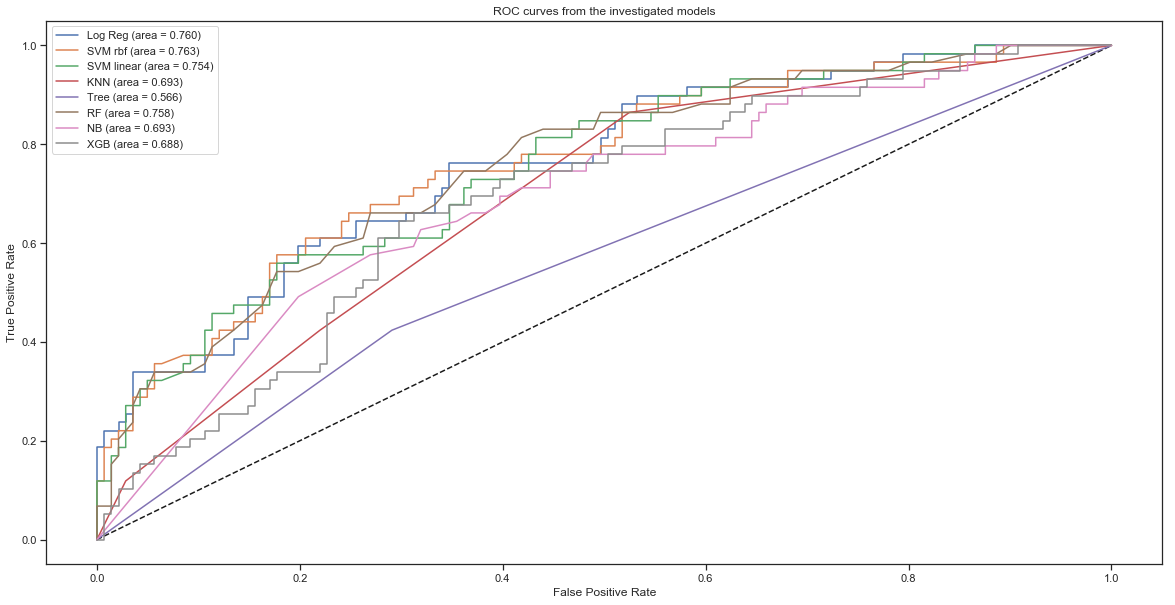

In [51]:
plt.figure(figsize=(20,10))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_lr, tpr_lr, label='Log Reg (area = %0.3f)' % roc_auc_lr)
plt.plot(fpr_SVMrbf, tpr_SVMrbf, label='SVM rbf (area = %0.3f)' % roc_auc_SVMrbf)
plt.plot(fpr_SVMlinear, tpr_SVMlinear, label='SVM linear (area = %0.3f)' % roc_auc_SVMlinear)
plt.plot(fpr_KNN, tpr_KNN, label='KNN (area = %0.3f)' % roc_auc_KNN)
plt.plot(fpr_Tree, tpr_Tree, label='Tree (area = %0.3f)' % roc_auc_Tree)
plt.plot(fpr_rf, tpr_rf, label='RF (area = %0.3f)' % roc_auc_rf)
plt.plot(fpr_nb, tpr_nb, label='NB (area = %0.3f)' % roc_auc_nb)
plt.plot(fpr_xgb, tpr_xgb, label='XGB (area = %0.3f)' % roc_auc_xgb)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves from the investigated models')
plt.legend(loc='best')
plt.show()

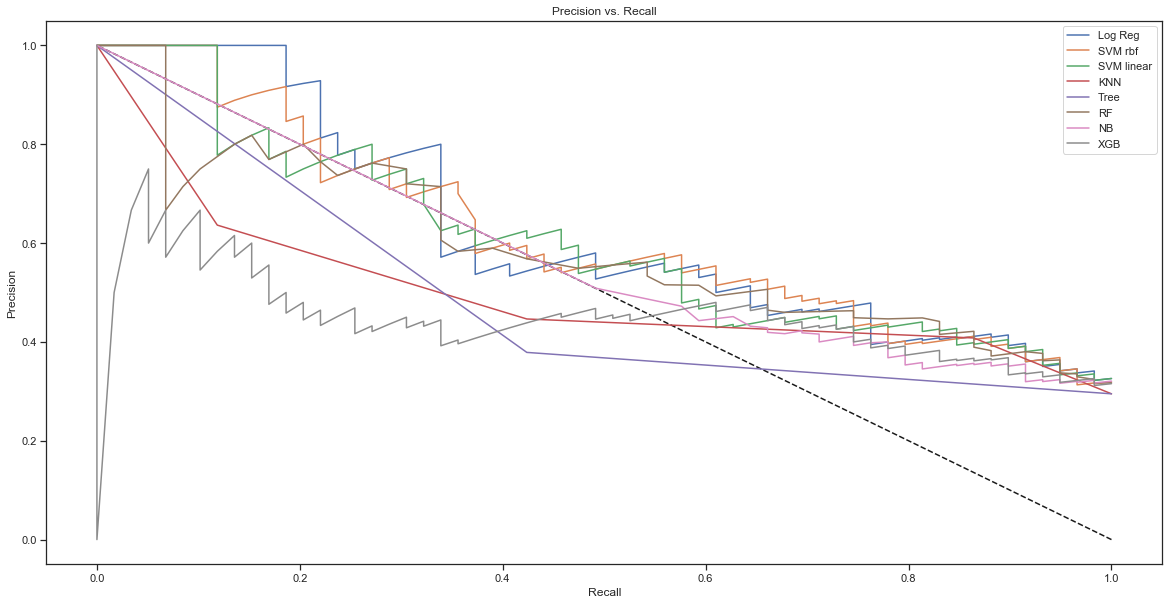

In [52]:
plt.figure(figsize=(20,10))
plt.plot([1, 0], [0, 1], 'k--')
plt.plot(recall_lr, precision_lr, label='Log Reg')
plt.plot(recall_SVMrbf, precision_SVMrbf, label='SVM rbf')
plt.plot(recall_SVMlinear, precision_SVMlinear, label='SVM linear')
plt.plot(recall_KNN, precision_KNN, label='KNN')
plt.plot(recall_Tree, precision_Tree, label='Tree')
plt.plot(recall_rf, precision_rf, label='RF')
plt.plot(recall_nb, precision_nb, label='NB')
plt.plot(recall_xgb, precision_xgb, label='XGB')
plt.title('Precision vs. Recall')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='best')
plt.show()

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

# fix random seed for reproducibility
np.random.seed(8)

Using TensorFlow backend.


In [54]:
y_train = to_categorical(y_train, num_classes = 2)
y_test = to_categorical(y_test, num_classes = 2)

In [55]:
model = Sequential()
model.add(Dense(8, input_dim=70, activation='relu'))
model.add(Dense(12, input_dim=70, activation='relu'))
model.add(Dense(12, input_dim=70, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.


In [56]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [57]:
epoch = 100
batch_size = 128

history = model.fit(X_train, y_train, batch_size = batch_size, epochs = epoch, 
          validation_data = (X_test, y_test), verbose = 2)

Instructions for updating:
Use tf.cast instead.
Train on 800 samples, validate on 200 samples
Epoch 1/100
 - 1s - loss: 0.6972 - acc: 0.4594 - val_loss: 0.6941 - val_acc: 0.5225
Epoch 2/100
 - 0s - loss: 0.6926 - acc: 0.5194 - val_loss: 0.6911 - val_acc: 0.5250
Epoch 3/100
 - 0s - loss: 0.6899 - acc: 0.5350 - val_loss: 0.6888 - val_acc: 0.5300
Epoch 4/100
 - 0s - loss: 0.6880 - acc: 0.5331 - val_loss: 0.6869 - val_acc: 0.5225
Epoch 5/100
 - 0s - loss: 0.6863 - acc: 0.5331 - val_loss: 0.6851 - val_acc: 0.5075
Epoch 6/100
 - 0s - loss: 0.6847 - acc: 0.5306 - val_loss: 0.6833 - val_acc: 0.4950
Epoch 7/100
 - 0s - loss: 0.6830 - acc: 0.5225 - val_loss: 0.6815 - val_acc: 0.4950
Epoch 8/100
 - 0s - loss: 0.6812 - acc: 0.5131 - val_loss: 0.6797 - val_acc: 0.5000
Epoch 9/100
 - 0s - loss: 0.6795 - acc: 0.5112 - val_loss: 0.6778 - val_acc: 0.5025
Epoch 10/100
 - 0s - loss: 0.6776 - acc: 0.5056 - val_loss: 0.6759 - val_acc: 0.5050
Epoch 11/100
 - 0s - loss: 0.6758 - acc: 0.5019 - val_loss: 0.674

In [58]:
score, acc = model.evaluate(X_test, y_test)
print('Test score:', score)
print('Test accuracy:', acc)

200/200 [==============================] - 0s 46us/step
Test score: 1.084309782385826
Test accuracy: 0.6425


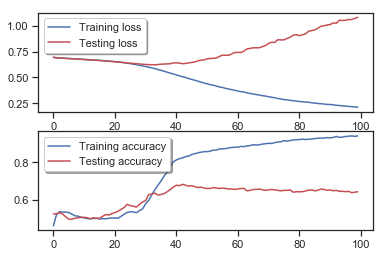

In [59]:
# Plot the loss and accuracy curves for training and validation vs. epochs


fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="Testing loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)
ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Testing accuracy")
legend = ax[1].legend(loc='best', shadow=True)
plt.show()

In [60]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

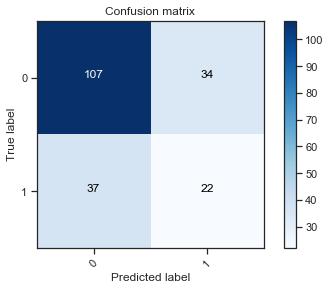

In [61]:
# Predict the values from the validation dataset
Y_pred = model.predict(X_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(2))
plt.show()

<h2> Machine Learning - ALL Variables  </h2>

In [62]:
df = pd.read_csv("Exam2019.csv")

In [63]:
df = df.dropna(how='any')
df["amount"] = np.log1p(df["amount"])
df = df.dropna(how='any')
SC= StandardScaler()
credit=df['amount'].values
credit= credit.reshape(-1,1)
df["amount"]= SC.fit_transform(credit)

In [64]:
df = df.merge(pd.get_dummies(df.purpose, drop_first=True, prefix='purpose'), left_index=True, right_index=True)
df = df.merge(pd.get_dummies(df.status, drop_first=True, prefix='status'), left_index=True, right_index=True)
df = df.merge(pd.get_dummies(df["savings"], drop_first=True, prefix='savings'), left_index=True, right_index=True)
df = df.merge(pd.get_dummies(df["checkingstatus1"], drop_first=True, prefix='checkingstatus1'), left_index=True, right_index=True)
df = df.merge(pd.get_dummies(df.housing, drop_first=True, prefix='housing'), left_index=True, right_index=True)
df = df.merge(pd.get_dummies(df.job, drop_first=True, prefix='job'), left_index=True, right_index=True)
df = df.merge(pd.get_dummies(df.age, drop_first=True, prefix='age'), left_index=True, right_index=True)
df = df.merge(pd.get_dummies(df.history, drop_first=True, prefix='history'), left_index=True, right_index=True)
df = df.merge(pd.get_dummies(df.employ, drop_first=True, prefix='employ'), left_index=True, right_index=True)
df = df.merge(pd.get_dummies(df.others, drop_first=True, prefix='others'), left_index=True, right_index=True)
df = df.merge(pd.get_dummies(df.property, drop_first=True, prefix='property'), left_index=True, right_index=True)
df = df.merge(pd.get_dummies(df.otherplans, drop_first=True, prefix='otherplans'), left_index=True, right_index=True)
df = df.merge(pd.get_dummies(df.tele, drop_first=True, prefix='tele'), left_index=True, right_index=True)
df = df.merge(pd.get_dummies(df.foreign, drop_first=True, prefix='foreign'), left_index=True, right_index=True)
df = df.merge(pd.get_dummies(df.installment, drop_first=True, prefix='installment'), left_index=True, right_index=True)
df = df.merge(pd.get_dummies(df.residence, drop_first=True, prefix='residence'), left_index=True, right_index=True)
df = df.merge(pd.get_dummies(df.cards, drop_first=True, prefix='cards'), left_index=True, right_index=True)
df = df.merge(pd.get_dummies(df.liable, drop_first=True, prefix='liable'), left_index=True, right_index=True)
df = df.merge(pd.get_dummies(df.duration, drop_first=True, prefix='duration'), left_index=True, right_index=True)

In [65]:
del df["checkingstatus1"]
del df["savings"]
del df["job"]
del df["status"]
del df["purpose"]
del df["housing"]
del df["history"]
del df["employ"]
del df["others"]
del df["property"]
del df["otherplans"]
del df["age"]
del df["tele"]
del df["foreign"]
del df["installment"]
del df["residence"]
del df["cards"]
del df["liable"]
del df["duration"]

In [66]:
X = df
X = df.drop('Default', axis= 1)
y = df['Default']
np.random.seed(888888)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 1)

In [67]:
import sklearn
from sklearn import*
abc=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree', 'Random forest', 'Naive Bayes', 'XGBoost']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),
        KNeighborsClassifier(n_neighbors=3),DecisionTreeClassifier(), 
        RandomForestClassifier(n_estimators=100,random_state=0, max_depth = 100), GaussianNB(), XGBClassifier(max_depth= 100, n_estimators=100)]
for i in models:
    model = i
    model.fit(X_train,y_train)
    prediction=model.predict(X_test)
    abc.append(metrics.accuracy_score(prediction,y_test))

models_dataframeacc=pd.DataFrame(abc,index=classifiers)   
models_dataframeacc.columns=['Accuracy']

efg=[]
for i in models:
    model = i
    model.fit(X_train,y_train)
    prediction=model.predict(X_test)
    efg.append(metrics.precision_score(prediction,y_test))

models_dataframeprec=pd.DataFrame(efg,index=classifiers)   
models_dataframeprec.columns=['Precision']

ijk=[]
for i in models:
    model = i
    model.fit(X_train,y_train)
    prediction=model.predict(X_test)
    ijk.append(metrics.recall_score(prediction,y_test))

models_dataframerec=pd.DataFrame(ijk,index=classifiers)   
models_dataframerec.columns=['Recall']

mno=[]
for i in models:
    model = i
    model.fit(X_train,y_train)
    prediction=model.predict(X_test)
    mno.append(metrics.f1_score(prediction,y_test))

models_dataframefone=pd.DataFrame(mno,index=classifiers)   
models_dataframefone.columns=['F1_Score']

scoredf = pd.concat([models_dataframeacc, models_dataframeprec,models_dataframerec,models_dataframefone], axis=1)
scoredf.columns = ["Accuracy","Precision","Recall","F1_score"]
scoredf

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning:

Default solver will be changed to 

,Accuracy,Precision,Recall,F1_score
Linear Svm,0.790,0.525424,0.688889,0.596154
Radial Svm,0.705,0.000000,0.000000,0.000000
Logistic Regression,0.775,0.474576,0.666667,0.554455
KNN,0.685,0.355932,0.456522,0.400000
Decision Tree,0.665,0.491525,0.424242,0.413223
Random forest,0.730,0.169492,0.666667,0.270270
Naive Bayes,0.325,0.915254,0.293478,0.444444
XGBoost,0.715,0.389831,0.522727,0.446602


In [68]:
# Logistic regression
modelLR = LogisticRegression()
modelLR.fit(X_train,y_train)
y_pred_prob_lr = modelLR.predict_proba(X_test)[:,1]
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_pred_prob_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)
precision_lr, recall_lr, th_lr = precision_recall_curve(y_test, y_pred_prob_lr)

# SVM with rbf
modelSVMrbf=svm.SVC(kernel='rbf', probability=True)
modelSVMrbf.fit(X_train,y_train)
y_pred_prob_SVMrbf = modelSVMrbf.predict_proba(X_test)[:,1]
fpr_SVMrbf, tpr_SVMrbf, thresholds_SVMrbf = roc_curve(y_test, y_pred_prob_SVMrbf)
roc_auc_SVMrbf = auc(fpr_SVMrbf, tpr_SVMrbf)
precision_SVMrbf, recall_SVMrbf, th_SVMrbf = precision_recall_curve(y_test, y_pred_prob_SVMrbf)

# SVM with linear
modelSVMlinear=svm.SVC(kernel='linear', probability=True)
modelSVMlinear.fit(X_train,y_train)
y_pred_prob_SVMlinear = modelSVMlinear.predict_proba(X_test)[:,1]
fpr_SVMlinear, tpr_SVMlinear, thresholds_SVMlinear = roc_curve(y_test, y_pred_prob_SVMlinear)
roc_auc_SVMlinear = auc(fpr_SVMlinear, tpr_SVMlinear)
precision_SVMlinear, recall_SVMlinear, th_SVMlinear = precision_recall_curve(y_test, y_pred_prob_SVMlinear)

# KNN
modelKNN = KNeighborsClassifier(n_neighbors=3)
modelKNN.fit(X_train,y_train)
y_pred_prob_KNN = modelKNN.predict_proba(X_test)[:,1]
fpr_KNN, tpr_KNN, thresholds_KNN = roc_curve(y_test, y_pred_prob_KNN)
roc_auc_KNN = auc(fpr_KNN, tpr_KNN)
precision_KNN, recall_KNN, th_KNN = precision_recall_curve(y_test, y_pred_prob_KNN)


# Decision Tree
modelTree=DecisionTreeClassifier()
modelTree.fit(X_train,y_train)
y_pred_prob_Tree = modelTree.predict_proba(X_test)[:,1]
fpr_Tree, tpr_Tree, thresholds_Tree = roc_curve(y_test, y_pred_prob_Tree)
roc_auc_Tree = auc(fpr_Tree, tpr_Tree)
precision_Tree, recall_Tree, th_Tree = precision_recall_curve(y_test, y_pred_prob_Tree)

# Random forest
modelRF= RandomForestClassifier(n_estimators=100,random_state=0, max_depth=100)
modelRF.fit(X_train,y_train)
y_pred_prob_rf = modelRF.predict_proba(X_test)[:,1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)
precision_rf, recall_rf, th_rf = precision_recall_curve(y_test, y_pred_prob_rf)


# Naive Bayes
modelNB= GaussianNB()
modelNB.fit(X_train,y_train)
y_pred_prob_nb = modelNB.predict_proba(X_test)[:,1]
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, y_pred_prob_nb)
roc_auc_nb = auc(fpr_nb, tpr_nb)
precision_nb, recall_nb, th_nb = precision_recall_curve(y_test, y_pred_prob_nb)

#XGBoost
modelXGB = xgb.XGBClassifier(max_depth= 100, n_estimators=100)
modelXGB.fit(X_train, y_train)
y_pred_prob_xgb = modelXGB.predict_proba(X_test)[:,1]
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, y_pred_prob_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)
precision_xgb, recall_xgb, th_xgb = precision_recall_curve(y_test, y_pred_prob_xgb)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.



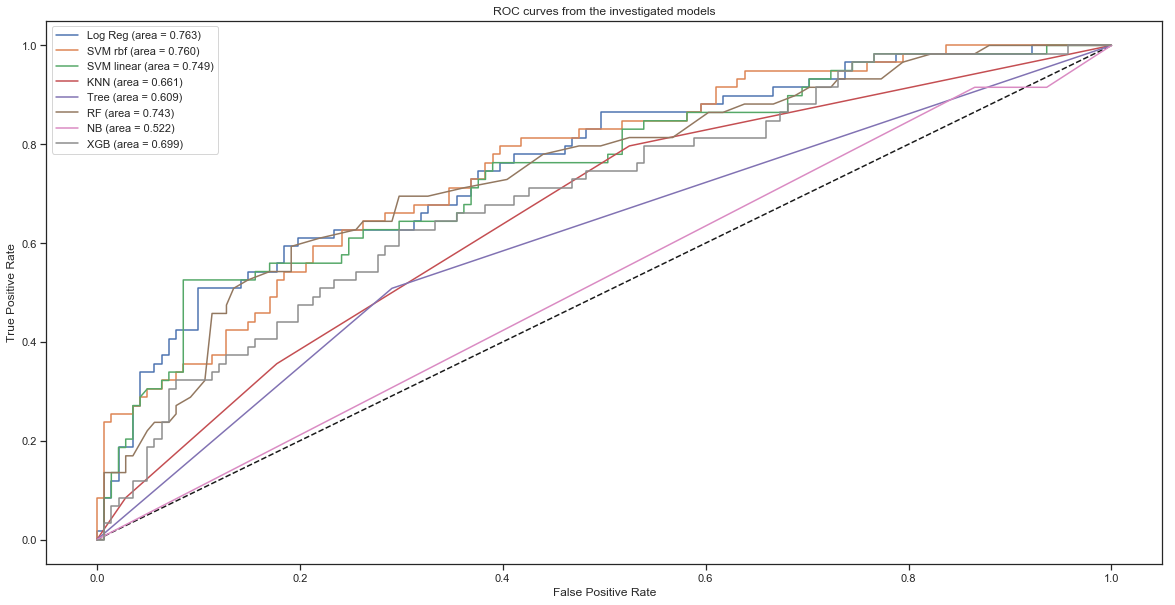

In [69]:
plt.figure(figsize=(20,10))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_lr, tpr_lr, label='Log Reg (area = %0.3f)' % roc_auc_lr)
plt.plot(fpr_SVMrbf, tpr_SVMrbf, label='SVM rbf (area = %0.3f)' % roc_auc_SVMrbf)
plt.plot(fpr_SVMlinear, tpr_SVMlinear, label='SVM linear (area = %0.3f)' % roc_auc_SVMlinear)
plt.plot(fpr_KNN, tpr_KNN, label='KNN (area = %0.3f)' % roc_auc_KNN)
plt.plot(fpr_Tree, tpr_Tree, label='Tree (area = %0.3f)' % roc_auc_Tree)
plt.plot(fpr_rf, tpr_rf, label='RF (area = %0.3f)' % roc_auc_rf)
plt.plot(fpr_nb, tpr_nb, label='NB (area = %0.3f)' % roc_auc_nb)
plt.plot(fpr_xgb, tpr_xgb, label='XGB (area = %0.3f)' % roc_auc_xgb)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves from the investigated models')
plt.legend(loc='best')
plt.show()

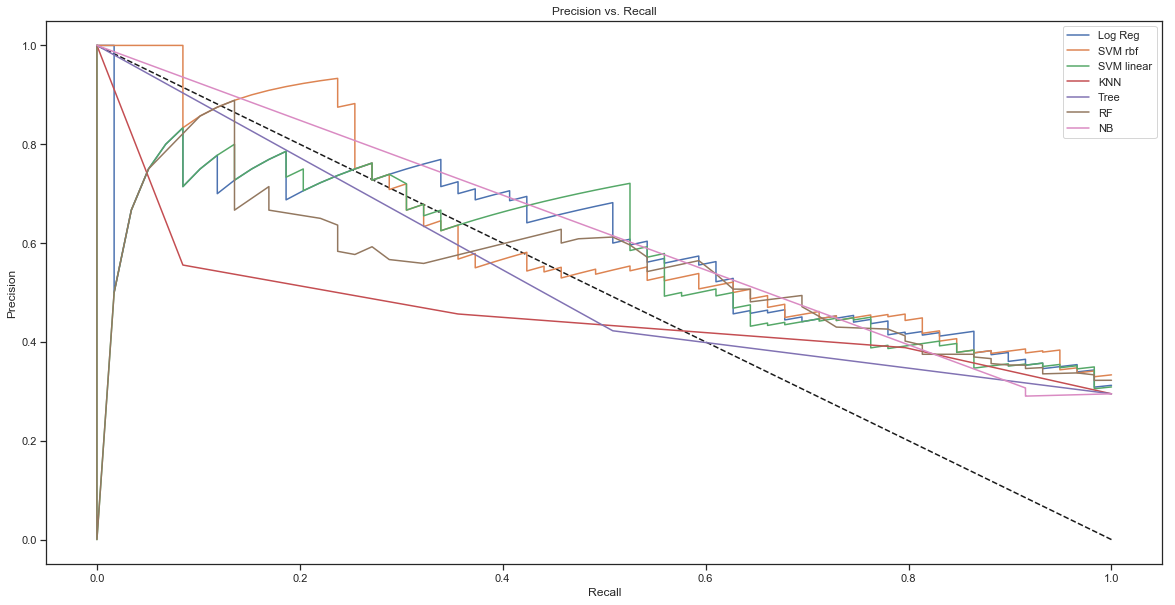

In [70]:
plt.figure(figsize=(20,10))
plt.plot([1, 0], [0, 1], 'k--')
plt.plot(recall_lr, precision_lr, label='Log Reg')
plt.plot(recall_SVMrbf, precision_SVMrbf, label='SVM rbf')
plt.plot(recall_SVMlinear, precision_SVMlinear, label='SVM linear')
plt.plot(recall_KNN, precision_KNN, label='KNN')
plt.plot(recall_Tree, precision_Tree, label='Tree')
plt.plot(recall_rf, precision_rf, label='RF')
plt.plot(recall_nb, precision_nb, label='NB')
plt.title('Precision vs. Recall')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='best')
plt.show()

In [71]:
y_train = to_categorical(y_train, num_classes = 2)
y_test = to_categorical(y_test, num_classes = 2)

In [72]:
model = Sequential()
model.add(Dense(8, input_dim=136, activation='relu'))
model.add(Dense(12, input_dim=136, activation='relu'))
model.add(Dense(12, input_dim=136, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

In [73]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [74]:
epoch = 100
batch_size = 128

history = model.fit(X_train, y_train, batch_size = batch_size, epochs = epoch, 
          validation_data = (X_test, y_test), verbose = 2)

Train on 800 samples, validate on 200 samples
Epoch 1/100
 - 1s - loss: 0.6892 - acc: 0.6550 - val_loss: 0.6864 - val_acc: 0.7025
Epoch 2/100
 - 0s - loss: 0.6833 - acc: 0.6981 - val_loss: 0.6797 - val_acc: 0.7050
Epoch 3/100
 - 0s - loss: 0.6761 - acc: 0.6981 - val_loss: 0.6717 - val_acc: 0.7050
Epoch 4/100
 - 0s - loss: 0.6676 - acc: 0.6981 - val_loss: 0.6623 - val_acc: 0.7050
Epoch 5/100
 - 0s - loss: 0.6573 - acc: 0.6981 - val_loss: 0.6516 - val_acc: 0.7050
Epoch 6/100
 - 0s - loss: 0.6466 - acc: 0.6987 - val_loss: 0.6391 - val_acc: 0.7050
Epoch 7/100
 - 0s - loss: 0.6338 - acc: 0.6987 - val_loss: 0.6266 - val_acc: 0.7050
Epoch 8/100
 - 0s - loss: 0.6218 - acc: 0.6987 - val_loss: 0.6143 - val_acc: 0.7050
Epoch 9/100
 - 0s - loss: 0.6106 - acc: 0.6987 - val_loss: 0.6042 - val_acc: 0.7050
Epoch 10/100
 - 0s - loss: 0.6031 - acc: 0.6987 - val_loss: 0.5972 - val_acc: 0.7050
Epoch 11/100
 - 0s - loss: 0.5970 - acc: 0.6987 - val_loss: 0.5927 - val_acc: 0.7050
Epoch 12/100
 - 0s - loss: 0

In [75]:
score, acc = model.evaluate(X_test, y_test)
print('Test score:', score)
print('Test accuracy:', acc)

200/200 [==============================] - 0s 38us/step
Test score: 1.0476391124725342
Test accuracy: 0.6925


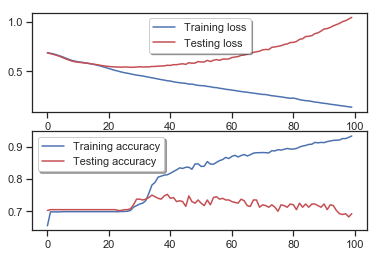

In [76]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="Testing loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)
ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Testing accuracy")
legend = ax[1].legend(loc='best', shadow=True)
plt.show()

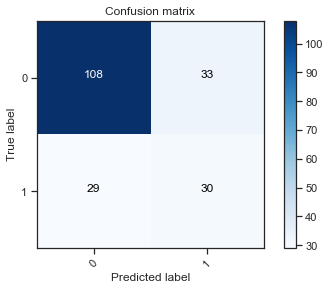

In [77]:
# Predict the values from the validation dataset
Y_pred = model.predict(X_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(2))
plt.show()

<h2> Machine Learning OVERSAMPLING - SMOTE </h2>

In [78]:
df = pd.read_csv("Exam2019.csv")

In [79]:
df = df.dropna(how='any')
df["amount"] = np.log1p(df["amount"])
df = df.dropna(how='any')
SC= StandardScaler()
credit=df['amount'].values
credit= credit.reshape(-1,1)
df["amount"]= SC.fit_transform(credit)

In [80]:
#dummyvariables
df = df.merge(pd.get_dummies(df.purpose, drop_first=True, prefix='purpose'), left_index=True, right_index=True)
df = df.merge(pd.get_dummies(df.status, drop_first=True, prefix='status'), left_index=True, right_index=True)
df = df.merge(pd.get_dummies(df["savings"], drop_first=True, prefix='savings'), left_index=True, right_index=True)
df = df.merge(pd.get_dummies(df["checkingstatus1"], drop_first=True, prefix='checkingstatus1'), left_index=True, right_index=True)
df = df.merge(pd.get_dummies(df.age, drop_first=True, prefix='age'), left_index=True, right_index=True)
df = df.merge(pd.get_dummies(df.history, drop_first=True, prefix='history'), left_index=True, right_index=True)
df = df.merge(pd.get_dummies(df.employ, drop_first=True, prefix='employ'), left_index=True, right_index=True)
df = df.merge(pd.get_dummies(df.property, drop_first=True, prefix='property'), left_index=True, right_index=True)
df = df.merge(pd.get_dummies(df.foreign, drop_first=True, prefix='foreign'), left_index=True, right_index=True)
df = df.merge(pd.get_dummies(df.installment, drop_first=True, prefix='installment'), left_index=True, right_index=True)
df = df.merge(pd.get_dummies(df.duration, drop_first=True, prefix='duration'), left_index=True, right_index=True)

In [81]:
#deleteoldervariables
del df["checkingstatus1"]
del df["savings"]
del df["job"]
del df["status"]
del df["purpose"]
del df["housing"]
del df["history"]
del df["employ"]
del df["property"]
del df["otherplans"]
del df["others"]
del df["age"]
del df["tele"]
del df["foreign"]
del df["installment"]
del df["residence"]
del df["cards"]
del df["liable"]
del df["duration"]

In [82]:
X = df
X = df.drop('Default', axis= 1)
y = df['Default']
np.random.seed(888888)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 1)

In [83]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=2)
X_train, y_train = sm.fit_sample(X_train, y_train)

In [84]:
import sklearn
from sklearn import*
abc=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree', 'Random forest', 'Naive Bayes']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),
        KNeighborsClassifier(n_neighbors=3),DecisionTreeClassifier(), 
        RandomForestClassifier(n_estimators=100,random_state=0, max_depth = 100), GaussianNB()]
for i in models:
    model = i
    model.fit(X_train,y_train)
    prediction=model.predict(X_test)
    abc.append(metrics.accuracy_score(prediction,y_test))

models_dataframeacc=pd.DataFrame(abc,index=classifiers)   
models_dataframeacc.columns=['Accuracy']

efg=[]
for i in models:
    model = i
    model.fit(X_train,y_train)
    prediction=model.predict(X_test)
    efg.append(metrics.precision_score(prediction,y_test))

models_dataframeprec=pd.DataFrame(efg,index=classifiers)   
models_dataframeprec.columns=['Precision']

ijk=[]
for i in models:
    model = i
    model.fit(X_train,y_train)
    prediction=model.predict(X_test)
    ijk.append(metrics.recall_score(prediction,y_test))

models_dataframerec=pd.DataFrame(ijk,index=classifiers)   
models_dataframerec.columns=['Recall']

mno=[]
for i in models:
    model = i
    model.fit(X_train,y_train)
    prediction=model.predict(X_test)
    mno.append(metrics.f1_score(prediction,y_test))

models_dataframefone=pd.DataFrame(mno,index=classifiers)   
models_dataframefone.columns=['F1_Score']

scoredf = pd.concat([models_dataframeacc, models_dataframeprec,models_dataframerec,models_dataframefone], axis=1)
scoredf.columns = ["Accuracy","Precision","Recall","F1_score"]
scoredf

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning:

Default solver will be changed to 

,Accuracy,Precision,Recall,F1_score
Linear Svm,0.675,0.627119,0.462500,0.532374
Radial Svm,0.685,0.745763,0.478261,0.582781
Logistic Regression,0.695,0.627119,0.486842,0.548148
KNN,0.560,0.728814,0.373913,0.494253
Decision Tree,0.710,0.576271,0.524590,0.528000
Random forest,0.745,0.372881,0.611111,0.463158
Naive Bayes,0.355,0.915254,0.303371,0.455696


In [85]:
# Logistic regression
modelLR = LogisticRegression()
modelLR.fit(X_train,y_train)
y_pred_prob_lr = modelLR.predict_proba(X_test)[:,1]
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_pred_prob_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)
precision_lr, recall_lr, th_lr = precision_recall_curve(y_test, y_pred_prob_lr)

# SVM with rbf
modelSVMrbf=svm.SVC(kernel='rbf', probability=True)
modelSVMrbf.fit(X_train,y_train)
y_pred_prob_SVMrbf = modelSVMrbf.predict_proba(X_test)[:,1]
fpr_SVMrbf, tpr_SVMrbf, thresholds_SVMrbf = roc_curve(y_test, y_pred_prob_SVMrbf)
roc_auc_SVMrbf = auc(fpr_SVMrbf, tpr_SVMrbf)
precision_SVMrbf, recall_SVMrbf, th_SVMrbf = precision_recall_curve(y_test, y_pred_prob_SVMrbf)

# SVM with linear
modelSVMlinear=svm.SVC(kernel='linear', probability=True)
modelSVMlinear.fit(X_train,y_train)
y_pred_prob_SVMlinear = modelSVMlinear.predict_proba(X_test)[:,1]
fpr_SVMlinear, tpr_SVMlinear, thresholds_SVMlinear = roc_curve(y_test, y_pred_prob_SVMlinear)
roc_auc_SVMlinear = auc(fpr_SVMlinear, tpr_SVMlinear)
precision_SVMlinear, recall_SVMlinear, th_SVMlinear = precision_recall_curve(y_test, y_pred_prob_SVMlinear)

# KNN
modelKNN = KNeighborsClassifier(n_neighbors=3)
modelKNN.fit(X_train,y_train)
y_pred_prob_KNN = modelKNN.predict_proba(X_test)[:,1]
fpr_KNN, tpr_KNN, thresholds_KNN = roc_curve(y_test, y_pred_prob_KNN)
roc_auc_KNN = auc(fpr_KNN, tpr_KNN)
precision_KNN, recall_KNN, th_KNN = precision_recall_curve(y_test, y_pred_prob_KNN)


# Decision Tree
modelTree=DecisionTreeClassifier()
modelTree.fit(X_train,y_train)
y_pred_prob_Tree = modelTree.predict_proba(X_test)[:,1]
fpr_Tree, tpr_Tree, thresholds_Tree = roc_curve(y_test, y_pred_prob_Tree)
roc_auc_Tree = auc(fpr_Tree, tpr_Tree)
precision_Tree, recall_Tree, th_Tree = precision_recall_curve(y_test, y_pred_prob_Tree)

# Random forest
modelRF= RandomForestClassifier(n_estimators=100,random_state=0, max_depth=100)
modelRF.fit(X_train,y_train)
y_pred_prob_rf = modelRF.predict_proba(X_test)[:,1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)
precision_rf, recall_rf, th_rf = precision_recall_curve(y_test, y_pred_prob_rf)


# Naive Bayes
modelNB= GaussianNB()
modelNB.fit(X_train,y_train)
y_pred_prob_nb = modelNB.predict_proba(X_test)[:,1]
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, y_pred_prob_nb)
roc_auc_nb = auc(fpr_nb, tpr_nb)
precision_nb, recall_nb, th_nb = precision_recall_curve(y_test, y_pred_prob_nb)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.



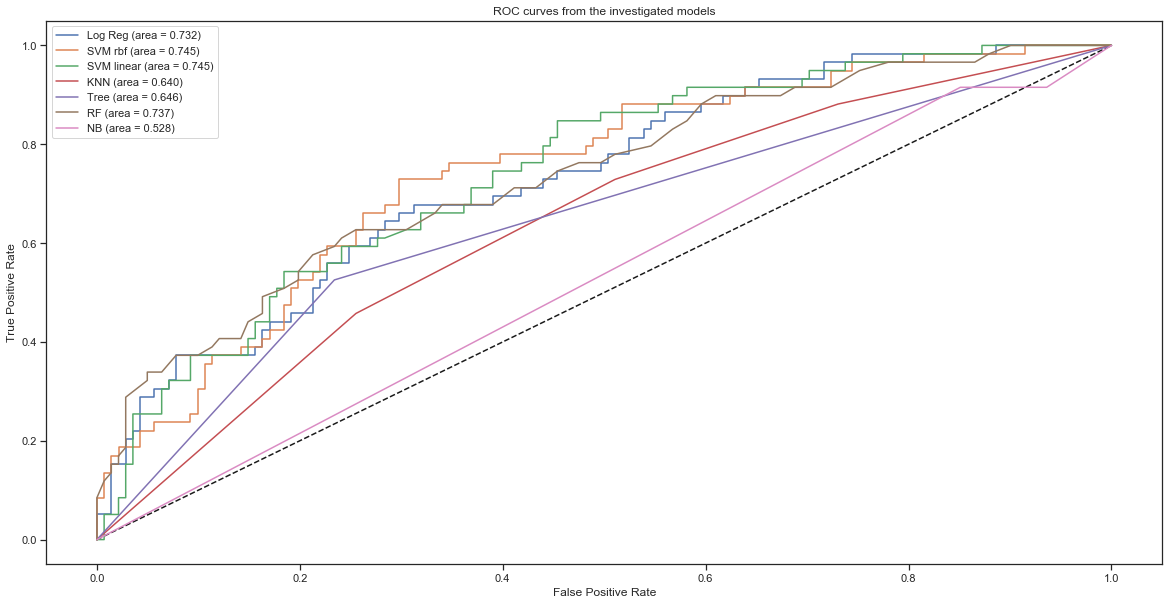

In [86]:
plt.figure(figsize=(20,10))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_lr, tpr_lr, label='Log Reg (area = %0.3f)' % roc_auc_lr)
plt.plot(fpr_SVMrbf, tpr_SVMrbf, label='SVM rbf (area = %0.3f)' % roc_auc_SVMrbf)
plt.plot(fpr_SVMlinear, tpr_SVMlinear, label='SVM linear (area = %0.3f)' % roc_auc_SVMlinear)
plt.plot(fpr_KNN, tpr_KNN, label='KNN (area = %0.3f)' % roc_auc_KNN)
plt.plot(fpr_Tree, tpr_Tree, label='Tree (area = %0.3f)' % roc_auc_Tree)
plt.plot(fpr_rf, tpr_rf, label='RF (area = %0.3f)' % roc_auc_rf)
plt.plot(fpr_nb, tpr_nb, label='NB (area = %0.3f)' % roc_auc_nb)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves from the investigated models')
plt.legend(loc='best')
plt.show()

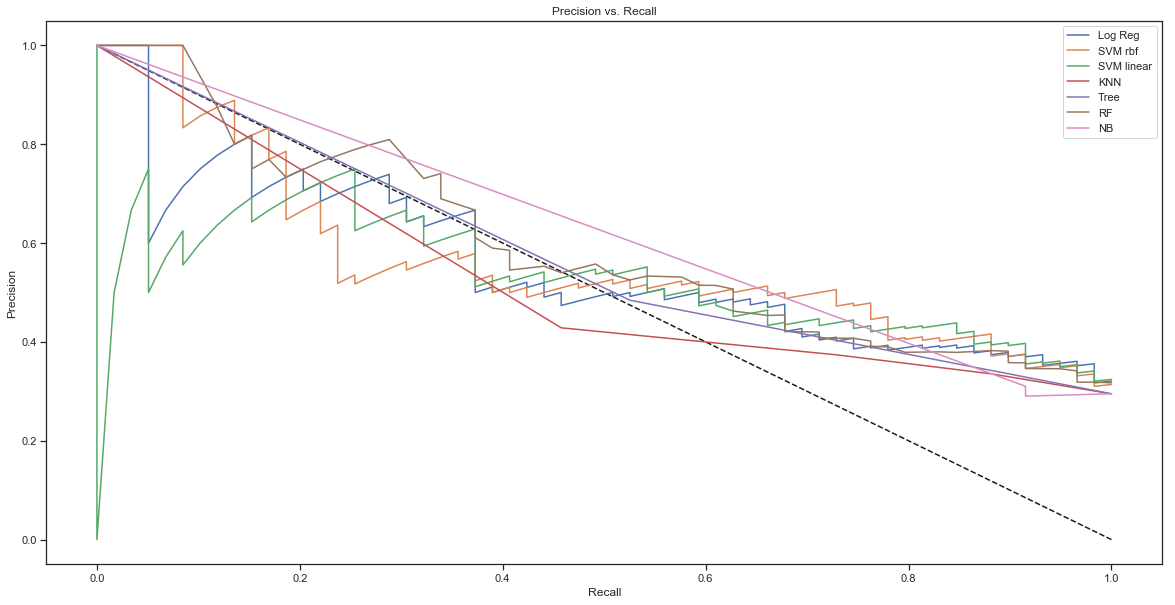

In [87]:
plt.figure(figsize=(20,10))
plt.plot([1, 0], [0, 1], 'k--')
plt.plot(recall_lr, precision_lr, label='Log Reg')
plt.plot(recall_SVMrbf, precision_SVMrbf, label='SVM rbf')
plt.plot(recall_SVMlinear, precision_SVMlinear, label='SVM linear')
plt.plot(recall_KNN, precision_KNN, label='KNN')
plt.plot(recall_Tree, precision_Tree, label='Tree')
plt.plot(recall_rf, precision_rf, label='RF')
plt.plot(recall_nb, precision_nb, label='NB')
plt.title('Precision vs. Recall')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='best')
plt.show()

In [88]:
y_train = to_categorical(y_train, num_classes = 2)
y_test = to_categorical(y_test, num_classes = 2)

In [89]:
model = Sequential()
model.add(Dense(8, input_dim=119, activation='relu'))
model.add(Dense(12, input_dim=119, activation='relu'))
model.add(Dense(12, input_dim=119, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

In [90]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [91]:
epoch = 100
batch_size = 128

history = model.fit(X_train, y_train, batch_size = batch_size, epochs = epoch, 
          validation_data = (X_test, y_test), verbose = 2)

Train on 1118 samples, validate on 200 samples
Epoch 1/100
 - 1s - loss: 0.6934 - acc: 0.4875 - val_loss: 0.6925 - val_acc: 0.4700
Epoch 2/100
 - 0s - loss: 0.6929 - acc: 0.4982 - val_loss: 0.6919 - val_acc: 0.4975
Epoch 3/100
 - 0s - loss: 0.6926 - acc: 0.5148 - val_loss: 0.6916 - val_acc: 0.4875
Epoch 4/100
 - 0s - loss: 0.6922 - acc: 0.5188 - val_loss: 0.6906 - val_acc: 0.5125
Epoch 5/100
 - 0s - loss: 0.6914 - acc: 0.5349 - val_loss: 0.6899 - val_acc: 0.5750
Epoch 6/100
 - 0s - loss: 0.6903 - acc: 0.5693 - val_loss: 0.6886 - val_acc: 0.6000
Epoch 7/100
 - 0s - loss: 0.6887 - acc: 0.5908 - val_loss: 0.6878 - val_acc: 0.5825
Epoch 8/100
 - 0s - loss: 0.6863 - acc: 0.6203 - val_loss: 0.6861 - val_acc: 0.5575
Epoch 9/100
 - 0s - loss: 0.6825 - acc: 0.6418 - val_loss: 0.6819 - val_acc: 0.5575
Epoch 10/100
 - 0s - loss: 0.6767 - acc: 0.6659 - val_loss: 0.6773 - val_acc: 0.5700
Epoch 11/100
 - 0s - loss: 0.6680 - acc: 0.6869 - val_loss: 0.6715 - val_acc: 0.5650
Epoch 12/100
 - 0s - loss: 

In [92]:
score, acc = model.evaluate(X_test, y_test)
print('Test score:', score)
print('Test accuracy:', acc)

200/200 [==============================] - 0s 47us/step
Test score: 1.695785174369812
Test accuracy: 0.6375


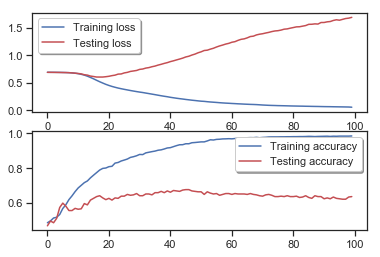

In [93]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="Testing loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)
ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Testing accuracy")
legend = ax[1].legend(loc='best', shadow=True)
plt.show()

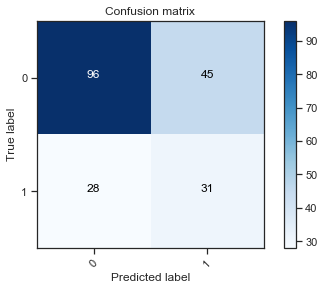

In [94]:
# Predict the values from the validation dataset
Y_pred = model.predict(X_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(2))
plt.show()

<h2> Machine Learning OVERSAMPLING - ADASYN </h2>

In [95]:
df = pd.read_csv("Exam2019.csv")

In [96]:
df = df.dropna(how='any')
df["amount"] = np.log1p(df["amount"])
df = df.dropna(how='any')
SC= StandardScaler()
credit=df['amount'].values
credit= credit.reshape(-1,1)
df["amount"]= SC.fit_transform(credit)

In [97]:
#dummyvariables
df = df.merge(pd.get_dummies(df.purpose, drop_first=True, prefix='purpose'), left_index=True, right_index=True)
df = df.merge(pd.get_dummies(df.status, drop_first=True, prefix='status'), left_index=True, right_index=True)
df = df.merge(pd.get_dummies(df["savings"], drop_first=True, prefix='savings'), left_index=True, right_index=True)
df = df.merge(pd.get_dummies(df["checkingstatus1"], drop_first=True, prefix='checkingstatus1'), left_index=True, right_index=True)
df = df.merge(pd.get_dummies(df.age, drop_first=True, prefix='age'), left_index=True, right_index=True)
df = df.merge(pd.get_dummies(df.history, drop_first=True, prefix='history'), left_index=True, right_index=True)
df = df.merge(pd.get_dummies(df.employ, drop_first=True, prefix='employ'), left_index=True, right_index=True)
df = df.merge(pd.get_dummies(df.property, drop_first=True, prefix='property'), left_index=True, right_index=True)
df = df.merge(pd.get_dummies(df.foreign, drop_first=True, prefix='foreign'), left_index=True, right_index=True)
df = df.merge(pd.get_dummies(df.installment, drop_first=True, prefix='installment'), left_index=True, right_index=True)
df = df.merge(pd.get_dummies(df.duration, drop_first=True, prefix='duration'), left_index=True, right_index=True)

In [98]:
del df["checkingstatus1"]
del df["savings"]
del df["job"]
del df["status"]
del df["purpose"]
del df["housing"]
del df["history"]
del df["employ"]
del df["others"]
del df["property"]
del df["otherplans"]
del df["age"]
del df["tele"]
del df["foreign"]
del df["installment"]
del df["residence"]
del df["cards"]
del df["liable"]
del df["duration"]

In [99]:
X = df
X = df.drop('Default', axis= 1)
y = df['Default']
np.random.seed(888888)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 1)

In [100]:
from imblearn.over_sampling import ADASYN
ada = ADASYN()
X_train, y_train = ada.fit_sample(X_train, y_train)

In [101]:
import sklearn
from sklearn import*
abc=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree', 'Random forest', 'Naive Bayes']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),
        KNeighborsClassifier(n_neighbors=3),DecisionTreeClassifier(), 
        RandomForestClassifier(n_estimators=100,random_state=0, max_depth = 100), GaussianNB()]
for i in models:
    model = i
    model.fit(X_train,y_train)
    prediction=model.predict(X_test)
    abc.append(metrics.accuracy_score(prediction,y_test))

models_dataframeacc=pd.DataFrame(abc,index=classifiers)   
models_dataframeacc.columns=['Accuracy']

efg=[]
for i in models:
    model = i
    model.fit(X_train,y_train)
    prediction=model.predict(X_test)
    efg.append(metrics.precision_score(prediction,y_test))

models_dataframeprec=pd.DataFrame(efg,index=classifiers)   
models_dataframeprec.columns=['Precision']

ijk=[]
for i in models:
    model = i
    model.fit(X_train,y_train)
    prediction=model.predict(X_test)
    ijk.append(metrics.recall_score(prediction,y_test))

models_dataframerec=pd.DataFrame(ijk,index=classifiers)   
models_dataframerec.columns=['Recall']

mno=[]
for i in models:
    model = i
    model.fit(X_train,y_train)
    prediction=model.predict(X_test)
    mno.append(metrics.f1_score(prediction,y_test))

models_dataframefone=pd.DataFrame(mno,index=classifiers)   
models_dataframefone.columns=['F1_Score']

scoredf = pd.concat([models_dataframeacc, models_dataframeprec,models_dataframerec,models_dataframefone], axis=1)
scoredf.columns = ["Accuracy","Precision","Recall","F1_score"]
scoredf

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning:

Default solver will be changed to 

,Accuracy,Precision,Recall,F1_score
Linear Svm,0.705,0.610169,0.500000,0.549618
Radial Svm,0.705,0.779661,0.500000,0.609272
Logistic Regression,0.710,0.610169,0.507042,0.553846
KNN,0.565,0.694915,0.372727,0.485207
Decision Tree,0.660,0.525424,0.410959,0.447761
Random forest,0.760,0.355932,0.677419,0.466667
Naive Bayes,0.355,0.915254,0.303371,0.455696


In [102]:
# Logistic regression
modelLR = LogisticRegression()
modelLR.fit(X_train,y_train)
y_pred_prob_lr = modelLR.predict_proba(X_test)[:,1]
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_pred_prob_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)
precision_lr, recall_lr, th_lr = precision_recall_curve(y_test, y_pred_prob_lr)

# SVM with rbf
modelSVMrbf=svm.SVC(kernel='rbf', probability=True)
modelSVMrbf.fit(X_train,y_train)
y_pred_prob_SVMrbf = modelSVMrbf.predict_proba(X_test)[:,1]
fpr_SVMrbf, tpr_SVMrbf, thresholds_SVMrbf = roc_curve(y_test, y_pred_prob_SVMrbf)
roc_auc_SVMrbf = auc(fpr_SVMrbf, tpr_SVMrbf)
precision_SVMrbf, recall_SVMrbf, th_SVMrbf = precision_recall_curve(y_test, y_pred_prob_SVMrbf)

# SVM with linear
modelSVMlinear=svm.SVC(kernel='linear', probability=True)
modelSVMlinear.fit(X_train,y_train)
y_pred_prob_SVMlinear = modelSVMlinear.predict_proba(X_test)[:,1]
fpr_SVMlinear, tpr_SVMlinear, thresholds_SVMlinear = roc_curve(y_test, y_pred_prob_SVMlinear)
roc_auc_SVMlinear = auc(fpr_SVMlinear, tpr_SVMlinear)
precision_SVMlinear, recall_SVMlinear, th_SVMlinear = precision_recall_curve(y_test, y_pred_prob_SVMlinear)

# KNN
modelKNN = KNeighborsClassifier(n_neighbors=3)
modelKNN.fit(X_train,y_train)
y_pred_prob_KNN = modelKNN.predict_proba(X_test)[:,1]
fpr_KNN, tpr_KNN, thresholds_KNN = roc_curve(y_test, y_pred_prob_KNN)
roc_auc_KNN = auc(fpr_KNN, tpr_KNN)
precision_KNN, recall_KNN, th_KNN = precision_recall_curve(y_test, y_pred_prob_KNN)


# Decision Tree
modelTree=DecisionTreeClassifier()
modelTree.fit(X_train,y_train)
y_pred_prob_Tree = modelTree.predict_proba(X_test)[:,1]
fpr_Tree, tpr_Tree, thresholds_Tree = roc_curve(y_test, y_pred_prob_Tree)
roc_auc_Tree = auc(fpr_Tree, tpr_Tree)
precision_Tree, recall_Tree, th_Tree = precision_recall_curve(y_test, y_pred_prob_Tree)

# Random forest
modelRF= RandomForestClassifier(n_estimators=100,random_state=0, max_depth=100)
modelRF.fit(X_train,y_train)
y_pred_prob_rf = modelRF.predict_proba(X_test)[:,1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)
precision_rf, recall_rf, th_rf = precision_recall_curve(y_test, y_pred_prob_rf)


# Naive Bayes
modelNB= GaussianNB()
modelNB.fit(X_train,y_train)
y_pred_prob_nb = modelNB.predict_proba(X_test)[:,1]
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, y_pred_prob_nb)
roc_auc_nb = auc(fpr_nb, tpr_nb)
precision_nb, recall_nb, th_nb = precision_recall_curve(y_test, y_pred_prob_nb)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.



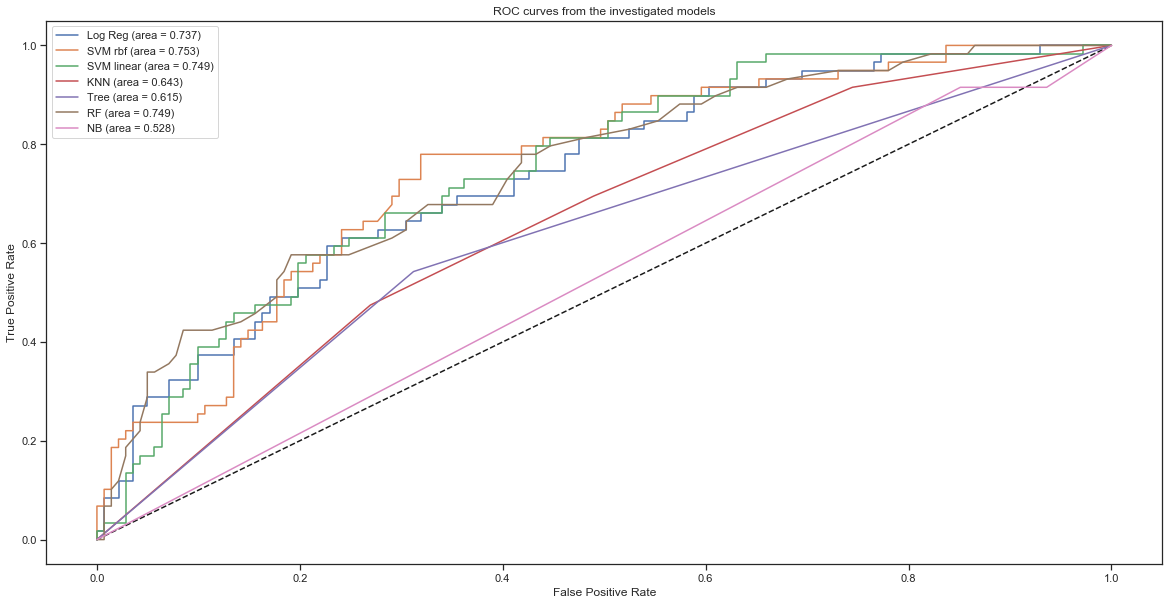

In [103]:
plt.figure(figsize=(20,10))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_lr, tpr_lr, label='Log Reg (area = %0.3f)' % roc_auc_lr)
plt.plot(fpr_SVMrbf, tpr_SVMrbf, label='SVM rbf (area = %0.3f)' % roc_auc_SVMrbf)
plt.plot(fpr_SVMlinear, tpr_SVMlinear, label='SVM linear (area = %0.3f)' % roc_auc_SVMlinear)
plt.plot(fpr_KNN, tpr_KNN, label='KNN (area = %0.3f)' % roc_auc_KNN)
plt.plot(fpr_Tree, tpr_Tree, label='Tree (area = %0.3f)' % roc_auc_Tree)
plt.plot(fpr_rf, tpr_rf, label='RF (area = %0.3f)' % roc_auc_rf)
plt.plot(fpr_nb, tpr_nb, label='NB (area = %0.3f)' % roc_auc_nb)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves from the investigated models')
plt.legend(loc='best')
plt.show()

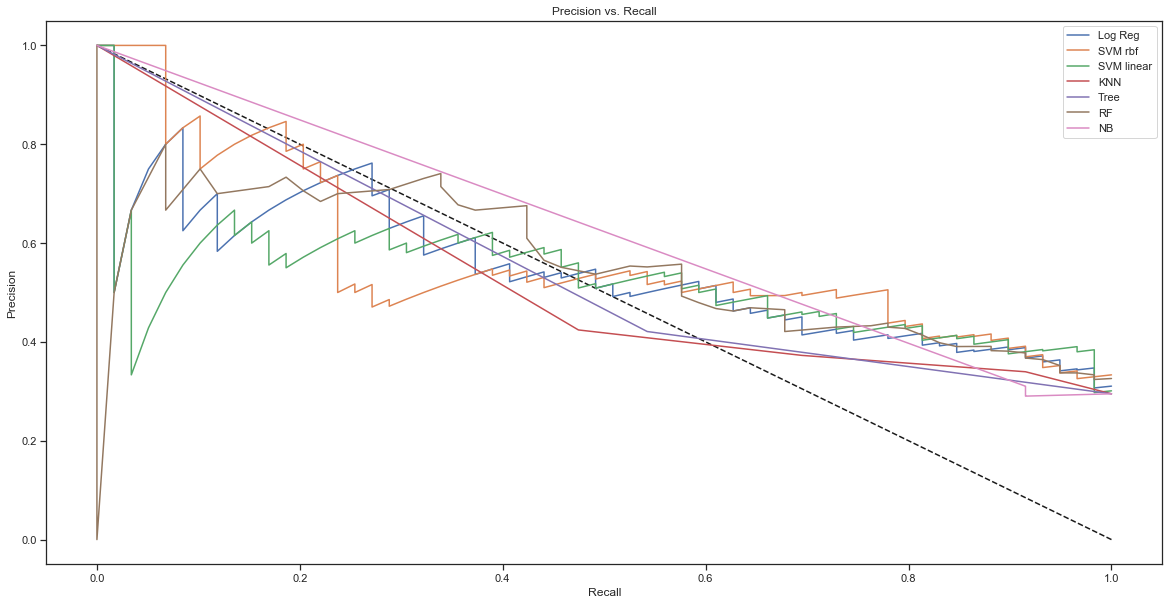

In [104]:
plt.figure(figsize=(20,10))
plt.plot([1, 0], [0, 1], 'k--')
plt.plot(recall_lr, precision_lr, label='Log Reg')
plt.plot(recall_SVMrbf, precision_SVMrbf, label='SVM rbf')
plt.plot(recall_SVMlinear, precision_SVMlinear, label='SVM linear')
plt.plot(recall_KNN, precision_KNN, label='KNN')
plt.plot(recall_Tree, precision_Tree, label='Tree')
plt.plot(recall_rf, precision_rf, label='RF')
plt.plot(recall_nb, precision_nb, label='NB')
plt.title('Precision vs. Recall')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='best')
plt.show()

In [105]:
y_train = to_categorical(y_train, num_classes = 2)
y_test = to_categorical(y_test, num_classes = 2)

In [106]:
model = Sequential()
model.add(Dense(8, input_dim=119, activation='relu'))
model.add(Dense(12, input_dim=119, activation='relu'))
model.add(Dense(12, input_dim=119, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

In [107]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [108]:
epoch = 100
batch_size = 128

history = model.fit(X_train, y_train, batch_size = batch_size, epochs = epoch, 
          validation_data = (X_test, y_test), verbose = 2)

Train on 1078 samples, validate on 200 samples
Epoch 1/100
 - 1s - loss: 0.6925 - acc: 0.4912 - val_loss: 0.6895 - val_acc: 0.5800
Epoch 2/100
 - 0s - loss: 0.6915 - acc: 0.4903 - val_loss: 0.6880 - val_acc: 0.5775
Epoch 3/100
 - 0s - loss: 0.6905 - acc: 0.4745 - val_loss: 0.6843 - val_acc: 0.5425
Epoch 4/100
 - 0s - loss: 0.6887 - acc: 0.4513 - val_loss: 0.6825 - val_acc: 0.5550
Epoch 5/100
 - 0s - loss: 0.6863 - acc: 0.4485 - val_loss: 0.6786 - val_acc: 0.5650
Epoch 6/100
 - 0s - loss: 0.6830 - acc: 0.4453 - val_loss: 0.6740 - val_acc: 0.5700
Epoch 7/100
 - 0s - loss: 0.6785 - acc: 0.4420 - val_loss: 0.6673 - val_acc: 0.6175
Epoch 8/100
 - 0s - loss: 0.6719 - acc: 0.4694 - val_loss: 0.6563 - val_acc: 0.6525
Epoch 9/100
 - 0s - loss: 0.6616 - acc: 0.5399 - val_loss: 0.6429 - val_acc: 0.7050
Epoch 10/100
 - 0s - loss: 0.6512 - acc: 0.5826 - val_loss: 0.6309 - val_acc: 0.7150
Epoch 11/100
 - 0s - loss: 0.6386 - acc: 0.6109 - val_loss: 0.6212 - val_acc: 0.7225
Epoch 12/100
 - 0s - loss: 

In [109]:
score, acc = model.evaluate(X_test, y_test)
print('Test score:', score)
print('Test accuracy:', acc)

200/200 [==============================] - 0s 42us/step
Test score: 1.0503654277324677
Test accuracy: 0.705


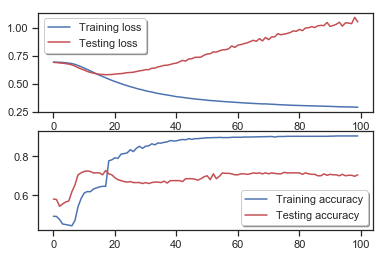

In [110]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="Testing loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)
ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Testing accuracy")
legend = ax[1].legend(loc='best', shadow=True)
plt.show()

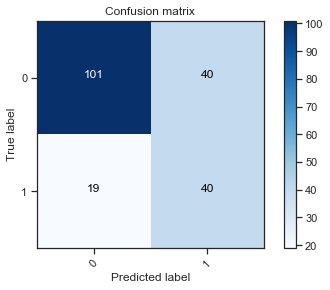

In [111]:
# Predict the values from the validation dataset
Y_pred = model.predict(X_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(2))
plt.show()